# Base Settings

In [61]:
pip install numpy pandas matplotlib seaborn statsmodels scikit-learn xgboost lightgbm optuna

Note: you may need to restart the kernel to use updated packages.


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [63]:
def get_dataframe_info(df):
    # 각 열별로 누락된 값의 수 계산
    null_counts = df.isnull().sum()

    # 각 열의 데이터 유형 확인 
    dtypes = df.dtypes

    # 데이터프레임 생성
    info_df = pd.DataFrame({'Column': df.columns,
                            'Null Count': null_counts,
                            'Data Type': dtypes})

    # 인덱스 숫자로 재설정
    info_df = info_df.reset_index(drop=True)

    return info_df

In [64]:
def duplicate_test(train_csv_filename, test_csv_filename):
    train_df = pd.read_csv('../Q1_data/' + train_csv_filename)
    test_df = pd.read_csv('../Q1_data/' + test_csv_filename)
    train_df.drop(train_df.columns[-1], axis=1, inplace=True)  ## 타겟인 "uenomax" 열 삭제
    test_df.drop(test_df.columns[0], axis=1, inplace=True)  ## "Unnamed: 0" 열 삭제
    concat_df = pd.concat([train_df, test_df], ignore_index=True)
    print("Train + Test dataset shape (features only):", concat_df.shape)
    print("Duplicated rows from the Train dataset:", train_df.duplicated().sum()) 
    print("Duplicated rows from the Train + Test dataset:", concat_df.duplicated().sum())

In [65]:
def show_null_pct(df):
    '''
    Show null count & percentage
    '''
    null_count_df = pd.DataFrame(df.isna().sum().sort_values(ascending=False))
    null_count_df.rename({0: 'Null Counts'}, axis=1, inplace=True)
    null_count_df['Null Ratio per Feature'] = np.round((null_count_df['Null Counts'] / len(df)) * 100, 4)
    null_count_df = null_count_df[null_count_df['Null Counts'] > 0]
    return null_count_df

In [66]:
def display_rows_cols(row=None, col=None):  
    pd.set_option('display.max_rows', row) 
    pd.set_option('display.max_columns', col)  
    print(f"Num rows displayed Limit: {pd.get_option('display.max_rows')}")
    print(f"Num columns displayed Limit: {pd.get_option('display.max_columns')}")

display_rows_cols(row=40)

Num rows displayed Limit: 40
Num columns displayed Limit: None


# EDA

### Data Description

|Variable Name| Description |
| -------- | -------- |
|datetime | 통계 데이터가 수집된 시각을 나타냅니다. 수집 주기는 5분이며, 일부 결측치가 존재할 수 있습니다.
|ru_id | 무선 기지국 장비인 RU(Radio Unit)의 ID를 나타냅니다. 10개의 RU에 대해 각각 BaseStationA부터 BaseStationJ까지의 값이 할당되어 있습니다.  
|scgfail | 5G 네트워크에 연결(SCG)을 시도했지만 실패한 횟수를 나타냅니다.  
|scgfailratio | 5G 네트워크에 연결(SCG)을 시도했지만 실패한 백분율을 나타냅니다.   
|erabaddatt | 5G 기지국이 데이터 연결(E-RAB)의 생성 또는 변경을 시도한 횟수를 나타냅니다.  
|erabaddsucc | 5G 기지국이 데이터 연결(E-RAB)의 생성 또는 변경을 성공한 횟수를 나타냅니다.  
|endcaddatt | LTE 마스터 기지국(MeNB)이 5G 서브 기지국(SgNB)의 추가를 시도한 횟수를 나타냅니다.  
|endcaddsucc | LTE 마스터 기지국(MeNB)이 5G 서브 기지국(SgNB)의 추가를 성공한 횟수를 나타냅니다.  
|endcmodbymenbatt | LTE 마스터 기지국(MeNB)이 5G 서브 기지국(SgNB)의 변경을 시도한 횟수를 나타냅니다.
|endcmodbymenbsucc | LTE 마스터 기지국(MeNB)이 5G 서브 기지국(SgNB)의 변경을 성공한 횟수를 나타냅니다. 이는 LTE 기지국의 변경 요청을 5G 기지국이 얼마나 잘 처리하고 있는지 보여주는 지표입니다.
|endcmodbysgnbatt | 5G 서브 기지국(SgNB)이 LTE 마스터 기지국(MeNB)의 변경을 시도한 횟수를 나타냅니다.
|endcmodbysgnbsucc | 5G 서브 기지국(SgNB)이 LTE 마스터 기지국(MeNB)의 변경을 성공한 횟수를 나타냅니다. 이는 5G 기지국의 변경 요청을 LTE 기지국이 얼마나 잘 처리하고 있는지 보여주는 지표입니다.
|connestabatt | 사용자 단말(UE)이 5G 기지국에 연결을 시도한 횟수를 나타냅니다.
|connestabsucc | 사용자 단말(UE)이 5G 기지국에 연결을 성공한 횟수를 나타냅니다.
|redirectiontolte_coverageout | 5G 네트워크의 서비스 범위를 벗어나서 LTE 네트워크로 자동 전환된 횟수를 나타냅니다.
|redirectiontolte_epsfallback | 특정 상황에서 5G 네트워크가 LTE 네트워크로 자동 전환(EPS Fallback)된 횟수를 나타냅니다.
|redirectiontolte_emergencyfallback | 긴급 상황에서 5G 네트워크가 LTE 네트워크로 자동 전환(Emergency Fallback)된 횟수를 나타냅니다.
|handoveratt | 사용자 단말(UE)이 다른 5G 기지국의 서비스 범위 안으로 이동할 때 해당 기지국과의 네트워크 연결을 시도한 횟수를 나타냅니다.
|handoversucc | 사용자 단말(UE)이 다른 5G 기지국의 서비스 범위 안으로 이동할 때 해당 기지국과의 네트워크 연결을 성공한 횟수를 나타냅니다. 이는 사용자 단말의 이동성을 얼마나 잘 처리하고 있는지 보여주는 지표입니다.
|reestabatt | 네트워크 연결이 끊어진 사용자 단말(UE)이 네트워크 연결 재설정 요청(RRCReestablishmentRequest)을 시도한 횟수를 나타냅니다.
|reestabsucc | 네트워크 연결이 끊어진 사용자 단말(UE)이 네트워크 연결 재설정 요청(RRCReestablishmentRequest)을 성공한 횟수를 나타냅니다.
|rlculbyte | 5G 기지국이 사용자 단말(UE)로부터 수신한 데이터 크기를 나타냅니다. 이는 5G 기지국이 사용자 단말로부터 얼마나 많은 데이터를 수신하고 있는지 보여주는 지표입니다.
|rlcdlbyte | 5G 기지국이 사용자 단말(UE)에 송신한 데이터 크기를 나타냅니다. 이는 5G 기지국이 사용자 단말에 얼마나 많은 데이터를 송신하고 있는지 보여주는 지표입니다.
|totprbulavg | 5G 기지국이 사용자 단말(UE)로부터 데이터를 수신하기 위해 사용한 무선 자원(PRB)의 평균을 나타냅니다. 이는 5G 기지국이 얼마나 효율적으로 무선 자원을 활용하고 있는지 보여주는 지표입니다.
|totprbdlavg | 5G 기지국이 사용자 단말(UE)에 데이터를 송신하기 위해 사용한 무선 자원(PRB)의 평균을 나타냅니다. 이는 5G 기지국이 얼마나 효율적으로 무선 자원을 활용하고 있는지 보여주는 지표입니다.
|dlreceivedriavg | 5G 기지국이 사용자 단말(UE)로부터 수신한 독립적인 신호 전송 가능 경로 개수(RI)의 평균을 나타냅니다. 이는 사용자 단말과 5G 기지국 간의 통신 품질을 보여주는 지표입니다.
|dltransmittedmcsavg | 5G 기지국이 사용자 단말(UE)에 송신한 데이터 전송 방식 조합(MCS)의 평균을 나타냅니다. 이는 데이터 전송의 효율성을 결정하는 데 사용하는 방식으로, 5G 기지국이 얼마나 효과적으로 데이터를 전송하고 있는지 나타내는 지표입니다.
|airmaculbyte | 5G 기지국이 사용자 단말(UE)로부터 물리 채널(PUSCH)을 통해 수신한 데이터 패킷(MAC PDU) 크기를 나타냅니다. 이는 5G 기지국이 사용자 단말로부터 얼마나 많은 데이터를 수신하고 있는지 보여주는 지표입니다.
|airmacdlbyte | 5G 기지국이 사용자 단말(UE)에 물리 채널(PDSCH)을 통해 송신한 데이터 패킷(MAC PDU) 크기를 나타냅니다. 이는 5G 기지국이 사용자 단말에 얼마나 많은 데이터를 송신하고 있는지 보여주는 지표입니다.
|bler_ul | 5G 기지국이 사용자 단말(UE)로부터 물리 채널(PUSCH)을 통한 데이터 수신에 실패하여 재전송한 백분율을 나타냅니다. 이는 5G 기지국이 사용자 단말로부터 얼마나 자주 데이터 수신에 실패하는지 보여주는 지표입니다.
|bler_dl | 5G 기지국이 사용자 단말(UE)에 물리 채널(PDSCH)을 통한 데이터 송신에 실패하여 재전송한 백분율을 나타냅니다. 이는 5G 기지국이 사용자 단말에 얼마나 자주 데이터 송신에 실패하는지 보여주는 지표입니다.
|rachpreamblea | 5G 기지국이 사용자 단말(UE)로부터 수신한 프리앰블(Preamble)의 개수를 나타냅니다. 이는 사용자 단말이 5G 네트워크에 접속하기 위한 신규 연결 시도 횟수를 의미합니다.
|numrar | 5G 기지국이 사용자 단말(UE)로부터 수신한 프리앰블(Preamble)에 대한 응답(RAR) 횟수를 나타냅니다. 이는 5G 기지국이 사용자 단말(UE)의 5G 네트워크 접속 요청을 인지하여 그에 대응한 횟수를 의미합니다.
|nummsg3 | 5G 기지국이 사용자 단말(UE)로부터 수신한 RAR 메시지에 대한 응답 횟수를 나타냅니다.
|attpaging | 5G 기지국이 사용자 단말(UE)에 통화나 데이터 전송을 알리기 위해 송신하는 페이징 시도 횟수를 나타냅니다.
|rssipathavg | 5G 기지국이 사용자 단말(UE)로부터 수신한 신호 수신 세기(RSSI)를 나타냅니다. 이는 사용자 단말이 5G 기지국의 신호를 얼마나 강하게 수신했는지 보여주는 지표입니다.
|dlreceivedcqiavg | 5G 기지국이 사용자 단말(UE)로부터 수신한 채널 품질 측정 정보(CQI)의 평균을 나타냅니다. 이는 5G 기지국이 사용자 단말에 데이터를 얼마나 빠르게 송신할 수 있는지 보여주는 지표입니다.
|endcrelbymenb | LTE 마스터 기지국(MeNB)이 5G 서브 기지국(SgNB)의 연결 해제를 시도한 횟수를 나타냅니다. 이는 LTE 네트워크와 5G 네트워크 간의 연결이 얼마나 자주 끊어지는지 보여주는 지표입니다.
|uenomax | 수집 주기 동안 무선 기지국 장비인 RU(Radio Unit)의 서비스 범위 안에 존재하던 사용자 단말(UE) 개수의 최댓값을 나타냅니다. 인구 1인당 단말 1대를 가지고 있다고 가정하며, 본 문제의 예측 대상입니다.

### Read in Data

In [67]:
Q1_train = pd.read_csv('../Q1_data/Q1_train.csv')
Q1_test = pd.read_csv('../Q1_data/Q1_test.csv', index_col=False)
Q1_test = Q1_test.drop(Q1_test.columns[0], axis=1)

display(Q1_train.head(2))
display(Q1_train.tail(2))
print("Train set size:", Q1_train.shape)
print("Test set size:", Q1_test.shape)

,datetime,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,endcmodbysgnbatt,endcmodbysgnbsucc,connestabatt,connestabsucc,redirectiontolte_coverageout,redirectiontolte_epsfallback,redirectiontolte_emergencyfallback,handoveratt,handoversucc,reestabatt,reestabsucc,rlculbyte,rlcdlbyte,totprbulavg,totprbdlavg,dlreceivedriavg,dltransmittedmcsavg,airmaculbyte,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb,uenomax
0,2023-05-19 00:00:00,BaseStationG,0,0.0,12,12,10,10,0,0,0,0,4,4,0,0,0,0,0,0,0,0.0,0.0,0.0,0.8,2.4,0.8,36.0,34.0,10.5,22.4,47.0,47.0,17.0,2243.0,-93.3,11.1,0,1
1,2023-05-19 00:00:00,BaseStationE,0,0.0,28,28,27,27,11,11,34,33,1,1,0,0,0,0,0,0,0,1242.0,57165.0,0.2,1.3,2.1,8.2,1915.0,73315.0,19.4,8.8,174.0,174.0,39.0,2240.0,-93.5,10.2,4,5


,datetime,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,endcmodbysgnbatt,endcmodbysgnbsucc,connestabatt,connestabsucc,redirectiontolte_coverageout,redirectiontolte_epsfallback,redirectiontolte_emergencyfallback,handoveratt,handoversucc,reestabatt,reestabsucc,rlculbyte,rlcdlbyte,totprbulavg,totprbdlavg,dlreceivedriavg,dltransmittedmcsavg,airmaculbyte,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb,uenomax
137443,2023-07-17 15:50:00,BaseStationA,1,16.7,6,6,6,6,0,0,6,6,4,4,1,0,0,0,0,0,0,28.0,48.0,0.0,0.8,1.8,2.5,134.0,104.0,36.6,42.4,19.0,19.0,10.0,9040.0,-92.2,11.8,4,2
137444,2023-07-17 15:50:00,BaseStationH,0,0.0,4,4,2,2,5,5,4,4,8,8,0,1,0,3,3,0,0,33.0,42.0,0.0,0.8,2.2,2.8,399.0,665.0,14.0,3.3,82.0,82.0,25.0,6589.0,-90.7,13.6,4,1


Train set size: (137445, 39)
Test set size: (34362, 38)


In [68]:
Q1_test.head(2)

,datetime,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,endcmodbysgnbatt,endcmodbysgnbsucc,connestabatt,connestabsucc,redirectiontolte_coverageout,redirectiontolte_epsfallback,redirectiontolte_emergencyfallback,handoveratt,handoversucc,reestabatt,reestabsucc,rlculbyte,rlcdlbyte,totprbulavg,totprbdlavg,dlreceivedriavg,dltransmittedmcsavg,airmaculbyte,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb
0,2023-05-19 00:00:00,BaseStationJ,0,0.0,5,5,5,5,0,0,1,1,1,1,0,0,0,1,1,0,0,0.0,0.0,0.0,0.8,1.4,4.8,43.0,412.0,13.3,22.4,73.0,73.0,7.0,1401.0,-93.0,9.8,0
1,2023-05-19 00:00:00,BaseStationB,0,0.0,3,3,3,3,0,0,2,2,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.8,1.9,0.4,2.0,1.0,0.0,0.0,5.0,5.0,4.0,2083.0,-92.8,5.9,4


In [69]:
duplicate_test("Q1_train.csv", "Q1_test.csv")

Train + Test dataset shape (features only): (171807, 38)
Duplicated rows from the Train dataset: 0
Duplicated rows from the Train + Test dataset: 0


In [70]:
print('Test to Train ratio:', np.round(Q1_test.shape[0] / Q1_train.shape[0], 2))

Test to Train ratio: 0.25


In [71]:
Q1_train.describe()

,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,endcmodbysgnbatt,endcmodbysgnbsucc,connestabatt,connestabsucc,redirectiontolte_coverageout,redirectiontolte_epsfallback,redirectiontolte_emergencyfallback,handoveratt,handoversucc,reestabatt,reestabsucc,rlculbyte,rlcdlbyte,totprbulavg,totprbdlavg,dlreceivedriavg,dltransmittedmcsavg,airmaculbyte,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb,uenomax
count,137445.000000,137445.000000,137445.000000,137445.000000,137445.000000,137445.000000,137445.000000,137445.000000,137445.000000,137445.000000,137445.000000,137445.000000,137445.000000,137445.000000,137445.000000,137445.000000,137445.000000,137445.000000,137445.000000,137436.000000,1.374360e+05,137436.000000,137436.000000,137436.000000,137436.000000,1.374360e+05,1.374360e+05,137436.000000,137436.000000,137436.000000,137436.000000,137436.000000,137436.000000,137436.000000,137436.000000,137445.000000,137445.000000
mean,0.475397,2.325791,22.161192,22.156826,17.025996,17.024373,3.223682,3.221630,15.928088,15.765048,7.347237,7.330605,0.208010,0.097959,0.000029,2.192521,2.183135,0.019186,0.018058,1750.376532,4.316078e+04,0.236819,1.223375,2.267533,6.022134,3.493025e+03,4.979932e+04,17.410947,8.858422,87.895457,87.895457,35.523720,3915.691886,-92.025727,10.989823,9.410164,3.718826
std,3.123961,8.017778,22.515448,22.512800,18.095460,18.094590,5.963767,5.962679,18.553934,18.383194,13.722430,13.691179,0.655433,0.391562,0.005395,3.913446,3.894536,0.163549,0.159604,7819.912344,1.195826e+05,0.815099,0.779749,0.524271,3.193148,1.236401e+04,1.269994e+05,13.782558,11.145992,83.700748,83.700748,37.783981,2152.009896,1.501118,1.736052,17.130541,2.781951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-96.600000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,8.000000,8.000000,7.000000,7.000000,0.000000,0.000000,5.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,1.461750e+03,0.000000,0.800000,2.000000,3.800000,3.190000e+02,2.581750e+03,13.500000,4.300000,34.000000,34.000000,14.000000,1863.000000,-92.600000,10.200000,1.000000,2.000000
50%,0.000000,0.000000,18.000000,18.000000,14.000000,14.000000,2.000000,2.000000,12.000000,12.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,554.000000,1.486150e+04,0.100000,1.000000,2.300000,5.900000,1.319000e+03,1.862300e+04,15.700000,6.900000,62.000000,62.000000,26.000000,3800.000000,-92.200000,11.200000,4.000000,3.000000
75%,1.000000,1.400000,30.000000,30.000000,23.000000,23.000000,4.000000,4.000000,22.000000,21.000000,9.000000,9.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1632.000000,5.094675e+04,0.200000,1.300000,2.600000,8.000000,3.509000e+03,5.978425e+04,18.500000,10.000000,119.000000,119.000000,45.000000,5586.000000,-91.500000,12.000000,13.000000,5.000000
max,299.000000,250.000000,823.000000,823.000000,725.000000,725.000000,348.000000,348.000000,664.000000,659.000000,419.000000,419.000000,20.000000,11.000000,1.000000,61.000000,60.000000,28.000000,28.000000,737286.000000,1.129500e+07,76.900000,49.600000,4.000000,25.000000,1.073999e+06,1.098665e+07,400.000000,300.000000,4587.000000,4587.000000,1487.000000,9590.000000,0.000000,15.000000,817.000000,74.000000


In [72]:
Q1_test.describe()

,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,endcmodbysgnbatt,endcmodbysgnbsucc,connestabatt,connestabsucc,redirectiontolte_coverageout,redirectiontolte_epsfallback,redirectiontolte_emergencyfallback,handoveratt,handoversucc,reestabatt,reestabsucc,rlculbyte,rlcdlbyte,totprbulavg,totprbdlavg,dlreceivedriavg,dltransmittedmcsavg,airmaculbyte,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb
count,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,34362.0,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,3.436200e+04,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,3.436200e+04,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000,34362.000000
mean,0.584948,5.235967,12.337728,12.332548,11.014580,11.011030,1.234765,1.232437,9.900180,9.850998,1.080671,1.078197,0.035184,0.020051,0.0,0.286916,0.286276,0.002241,0.002095,499.893836,1.894839e+04,0.066562,0.995099,1.831660,5.384387,815.201764,1.977266e+04,21.672545,12.485531,46.695303,46.695303,14.462255,3544.176911,-92.581651,9.307671,6.745009
std,2.658160,12.705401,9.589296,9.587124,8.792817,8.790806,2.334983,2.331337,8.156357,8.110761,2.146116,2.143324,0.201162,0.152698,0.0,0.905896,0.904749,0.047897,0.046360,6412.906415,5.043855e+04,0.675801,0.510513,0.456041,3.788045,6698.175739,5.139567e+04,27.922844,21.918854,44.822082,44.822082,10.909921,2115.547908,1.035072,2.085327,9.075888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-93.100000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,5.700000e+01,0.000000,0.800000,1.600000,2.200000,38.000000,1.000000e+02,12.100000,3.200000,18.000000,18.000000,7.000000,1645.000000,-92.700000,8.100000,0.000000
50%,0.000000,0.000000,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,83.000000,3.107500e+03,0.000000,0.900000,1.900000,5.100000,218.000000,3.667000e+03,15.200000,6.900000,31.000000,31.000000,12.000000,3371.000000,-92.600000,9.300000,2.000000
75%,1.000000,4.500000,17.000000,17.000000,15.000000,15.000000,2.000000,2.000000,14.000000,14.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,415.000000,1.809825e+04,0.100000,1.000000,2.000000,8.100000,805.000000,1.925275e+04,20.400000,12.200000,62.000000,62.000000,20.000000,4929.000000,-92.500000,10.600000,11.000000
max,314.000000,200.000000,378.000000,378.000000,337.000000,337.000000,91.000000,91.000000,122.000000,120.000000,29.000000,29.000000,9.000000,4.000000,0.0,17.000000,17.000000,2.000000,2.000000,917781.000000,2.464550e+06,97.800000,22.600000,4.000000,23.600000,929309.000000,2.477010e+06,400.000000,300.000000,1064.000000,1064.000000,254.000000,9590.000000,0.000000,15.000000,108.000000


In [73]:
group_train = Q1_train.groupby('ru_id').describe()
group_test = Q1_test.groupby('ru_id').describe()
group = pd.concat([group_train['rlcdlbyte'], group_test['rlcdlbyte']], axis=0)
group_transposed = group.transpose()
display(group_transposed)

ru_id,BaseStationA,BaseStationC,BaseStationD,BaseStationE,BaseStationF,BaseStationG,BaseStationH,BaseStationI,BaseStationB,BaseStationJ
count,1.718100e+04,1.718100e+04,1.718100e+04,1.717700e+04,1.717700e+04,1.717700e+04,1.718100e+04,17181.000000,1.718100e+04,1.718100e+04
mean,2.100685e+04,5.349045e+04,3.823117e+04,6.198355e+04,1.039752e+05,2.834006e+04,2.706239e+04,11211.678889,2.148773e+04,1.640905e+04
std,5.428298e+04,7.968980e+04,6.861224e+04,1.386406e+05,1.511000e+05,5.698149e+04,2.190356e+05,30859.499008,4.734801e+04,5.323073e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,2.140000e+02,5.247000e+03,2.858000e+03,1.118400e+04,2.702000e+04,3.969000e+03,1.950000e+02,6.000000,6.900000e+01,4.700000e+01
50%,4.580000e+03,2.800700e+04,1.866700e+04,3.319300e+04,7.067800e+04,1.416000e+04,4.891000e+03,625.000000,4.438000e+03,2.252000e+03
75%,1.885800e+04,7.114000e+04,5.193300e+04,7.532400e+04,1.399580e+05,3.492200e+04,2.167700e+04,8870.000000,2.255600e+04,1.369100e+04
max,1.552060e+06,1.697730e+06,2.328620e+06,7.908040e+06,7.072500e+06,4.121070e+06,1.129500e+07,716513.000000,2.031820e+06,2.464550e+06


In [74]:
get_dataframe_info(Q1_train)

,Column,Null Count,Data Type
0,datetime,0,object
1,ru_id,0,object
2,scgfail,0,int64
3,scgfailratio,0,float64
4,erabaddatt,0,int64
5,erabaddsucc,0,int64
6,endcaddatt,0,int64
7,endcaddsucc,0,int64
8,endcmodbymenbatt,0,int64
9,endcmodbymenbsucc,0,int64


### Missing Values

In [75]:
show_null_pct(Q1_train)

,Null Counts,Null Ratio per Feature
bler_dl,9,0.0065
bler_ul,9,0.0065
rlcdlbyte,9,0.0065
totprbulavg,9,0.0065
totprbdlavg,9,0.0065
dlreceivedriavg,9,0.0065
dltransmittedmcsavg,9,0.0065
airmaculbyte,9,0.0065
airmacdlbyte,9,0.0065
rlculbyte,9,0.0065


In [76]:
show_null_pct(Q1_test)

,Null Counts,Null Ratio per Feature


In [77]:
missing_values_per_row = Q1_train.isnull().sum(axis=1)
rows_with_missing_values = Q1_train[missing_values_per_row > 0]
cols_with_nas = Q1_train.columns[Q1_train.isnull().any()]  ## NA를 포함하는 열 이름 필터링

display(rows_with_missing_values[cols_with_nas])
print(rows_with_missing_values[cols_with_nas].shape)

,rlculbyte,rlcdlbyte,totprbulavg,totprbdlavg,dlreceivedriavg,dltransmittedmcsavg,airmaculbyte,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg
43864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(9, 16)


In [78]:
rows_missing_values = Q1_train[Q1_train.isna().any(axis=1)]
rows_missing_values

,datetime,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,endcmodbysgnbatt,endcmodbysgnbsucc,connestabatt,connestabsucc,redirectiontolte_coverageout,redirectiontolte_epsfallback,redirectiontolte_emergencyfallback,handoveratt,handoversucc,reestabatt,reestabsucc,rlculbyte,rlcdlbyte,totprbulavg,totprbdlavg,dlreceivedriavg,dltransmittedmcsavg,airmaculbyte,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb,uenomax
43864,2023-06-07 00:55:00,BaseStationG,0,0.0,9,9,6,6,1,1,3,3,4,4,0,0,0,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2
43865,2023-06-07 00:55:00,BaseStationE,0,0.0,18,18,12,12,0,0,13,13,2,2,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4
43866,2023-06-07 00:55:00,BaseStationF,0,0.0,16,16,8,8,1,1,11,11,13,13,0,0,0,6,6,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5
96845,2023-06-30 00:55:00,BaseStationG,0,0.0,29,29,24,24,1,1,14,14,4,4,0,0,0,2,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4
96846,2023-06-30 00:55:00,BaseStationE,0,0.0,21,21,17,17,8,8,16,16,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4
96847,2023-06-30 00:55:00,BaseStationF,1,3.8,26,26,19,19,3,3,19,19,10,10,0,0,0,4,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4
117573,2023-07-09 00:55:00,BaseStationG,0,0.0,16,16,6,6,0,0,19,19,0,0,0,0,0,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
117574,2023-07-09 00:55:00,BaseStationE,1,4.3,23,23,22,22,2,2,12,12,2,2,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4
117575,2023-07-09 00:55:00,BaseStationF,1,2.9,34,34,28,28,1,1,19,19,5,5,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9


In [79]:
rows_missing_values['ru_id'].value_counts()

ru_id
BaseStationG    3
BaseStationE    3
BaseStationF    3
Name: count, dtype: int64

### ru_id

In [80]:
Q1_train['ru_id'].value_counts()

ru_id
BaseStationI    17181
BaseStationD    17181
BaseStationC    17181
BaseStationA    17181
BaseStationH    17181
BaseStationG    17180
BaseStationE    17180
BaseStationF    17180
Name: count, dtype: int64

In [81]:
Q1_test['ru_id'].value_counts()

ru_id
BaseStationJ    17181
BaseStationB    17181
Name: count, dtype: int64

In [82]:
# 각 'ru_id'에 대한 데이터프레임 저장
train_stations = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
basestations = {}  # BaseStation 데이터프레임을 저장할 딕셔너리 생성
for station in train_stations:
    basestations[f'ru_id_{station}'] = Q1_train[Q1_train['ru_id'] == f'BaseStation{station}']

basestations['ru_id_C'].head(3)

,datetime,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,endcmodbysgnbatt,endcmodbysgnbsucc,connestabatt,connestabsucc,redirectiontolte_coverageout,redirectiontolte_epsfallback,redirectiontolte_emergencyfallback,handoveratt,handoversucc,reestabatt,reestabsucc,rlculbyte,rlcdlbyte,totprbulavg,totprbdlavg,dlreceivedriavg,dltransmittedmcsavg,airmaculbyte,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb,uenomax
5,2023-05-19 00:00:00,BaseStationC,0,0.0,13,13,9,9,7,7,18,18,10,10,0,0,0,0,0,0,0,959.0,53771.0,0.2,1.4,2.0,6.5,2006.0,55524.0,15.7,16.6,47.0,47.0,25.0,2083.0,-91.7,9.4,9,4
13,2023-05-19 00:05:00,BaseStationC,1,7.7,13,13,12,12,3,3,11,11,5,5,0,0,0,0,0,0,0,271.0,38283.0,0.1,1.2,2.0,8.5,845.0,40370.0,16.3,10.8,37.0,37.0,18.0,1936.0,-91.7,9.1,7,3
21,2023-05-19 00:10:00,BaseStationC,0,0.0,20,20,17,17,0,0,21,21,5,5,0,0,0,0,0,0,0,240.0,64443.0,0.1,1.4,2.0,10.2,588.0,70084.0,15.7,12.5,48.0,48.0,27.0,1874.0,-91.7,9.1,20,5


### Datetime Features

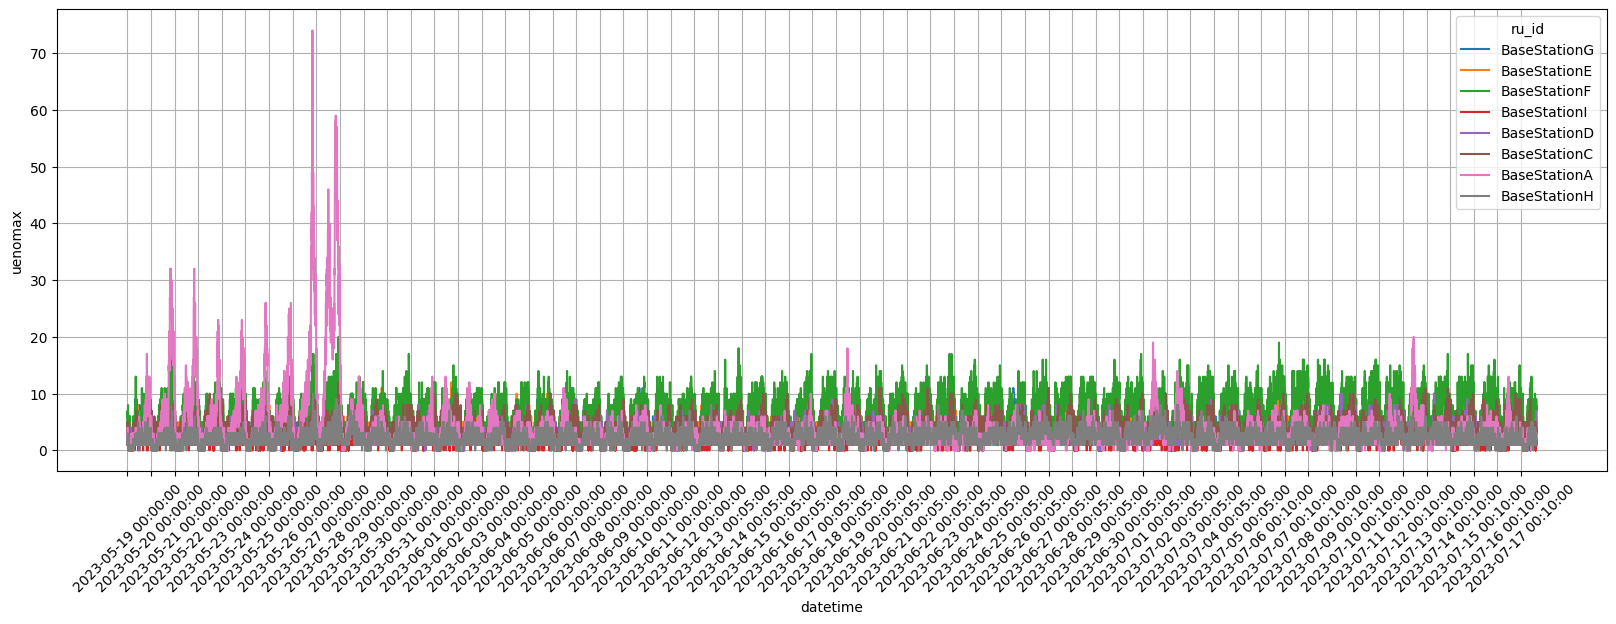

In [83]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=Q1_train, x='datetime', y='uenomax', hue='ru_id')
plt.ylabel('uenomax')
plt.grid(True)
xtick_locations = Q1_train.iloc[::2304, 0].values  ## 2304번째(하루) 관측값마다 xticks 표시
plt.xticks(xtick_locations, rotation=45)

plt.show()

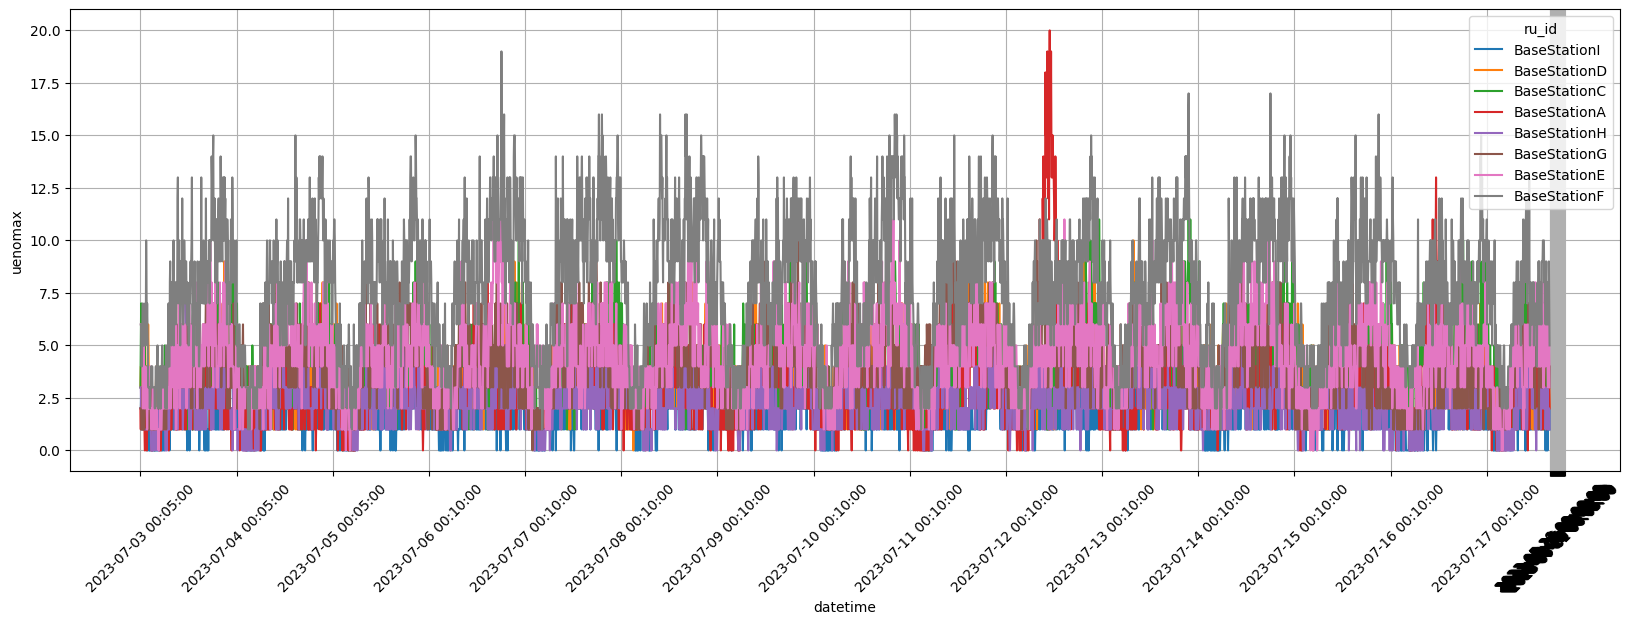

In [84]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=Q1_train[103680:], x='datetime', y='uenomax', hue='ru_id')
plt.ylabel('uenomax')
plt.grid(True)
xtick_locations = Q1_train.iloc[::2304, 0].values  ## 2304번째(하루) 관측값마다 xticks 표시
plt.xticks(xtick_locations, rotation=45)

plt.show()

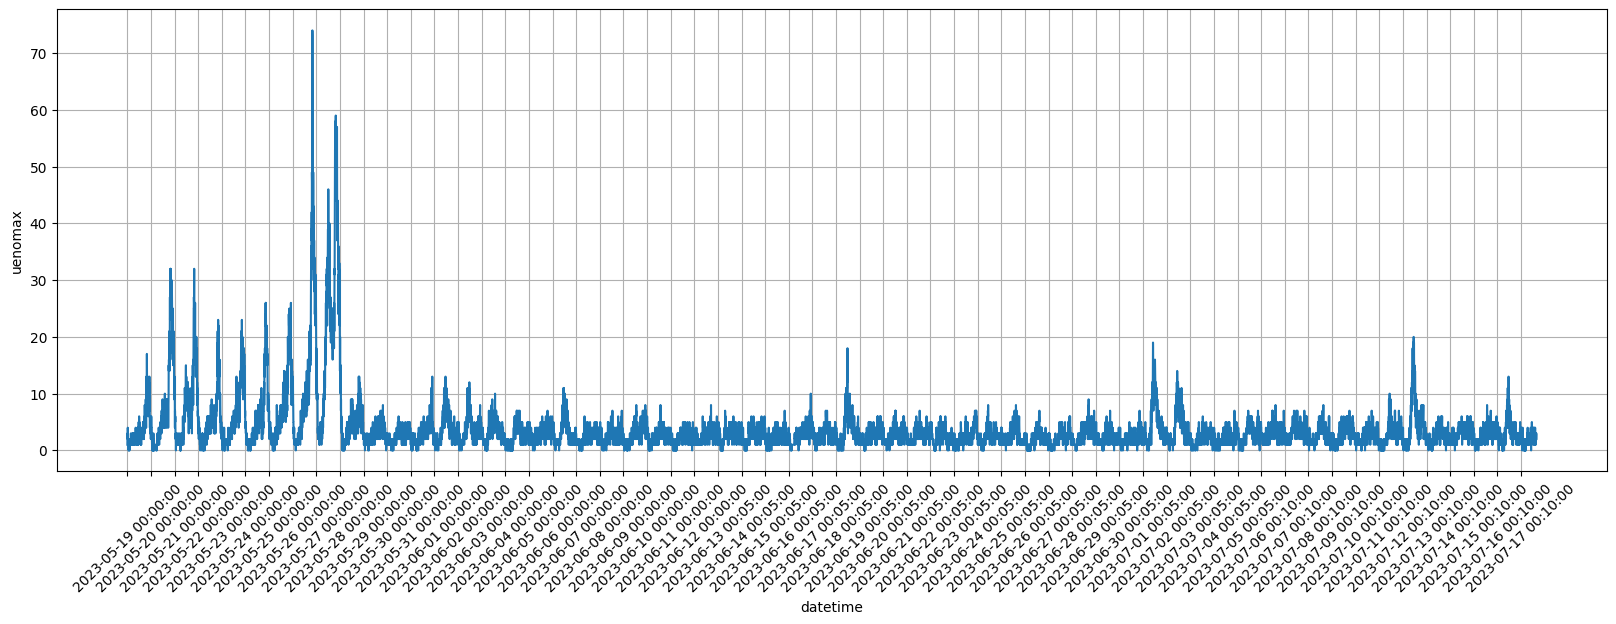

In [85]:
Q1_train_A = Q1_train[Q1_train['ru_id'] == 'BaseStationA']

plt.figure(figsize=(20, 6))
sns.lineplot(data=Q1_train_A, x='datetime', y='uenomax')
plt.ylabel('uenomax')
plt.grid(True)
xtick_locations = Q1_train_A.iloc[::288, 0].values  ## 288번째(하루) 관측값마다 xticks 표시
plt.xticks(xtick_locations, rotation=45)
plt.show()

In [86]:
top_20_observations = Q1_train.nlargest(20, 'uenomax').sort_values('datetime')[['datetime', 'ru_id','uenomax']]
top_20_observations.sort_values(by='uenomax', ascending=False)

,datetime,ru_id,uenomax
18054,2023-05-26 20:00:00,BaseStationA,74
18062,2023-05-26 20:05:00,BaseStationA,73
18046,2023-05-26 19:55:00,BaseStationA,61
20334,2023-05-27 19:45:00,BaseStationA,59
20326,2023-05-27 19:40:00,BaseStationA,59
18070,2023-05-26 20:10:00,BaseStationA,58
18078,2023-05-26 20:15:00,BaseStationA,58
18086,2023-05-26 20:20:00,BaseStationA,58
20294,2023-05-27 19:20:00,BaseStationA,58
20302,2023-05-27 19:25:00,BaseStationA,58


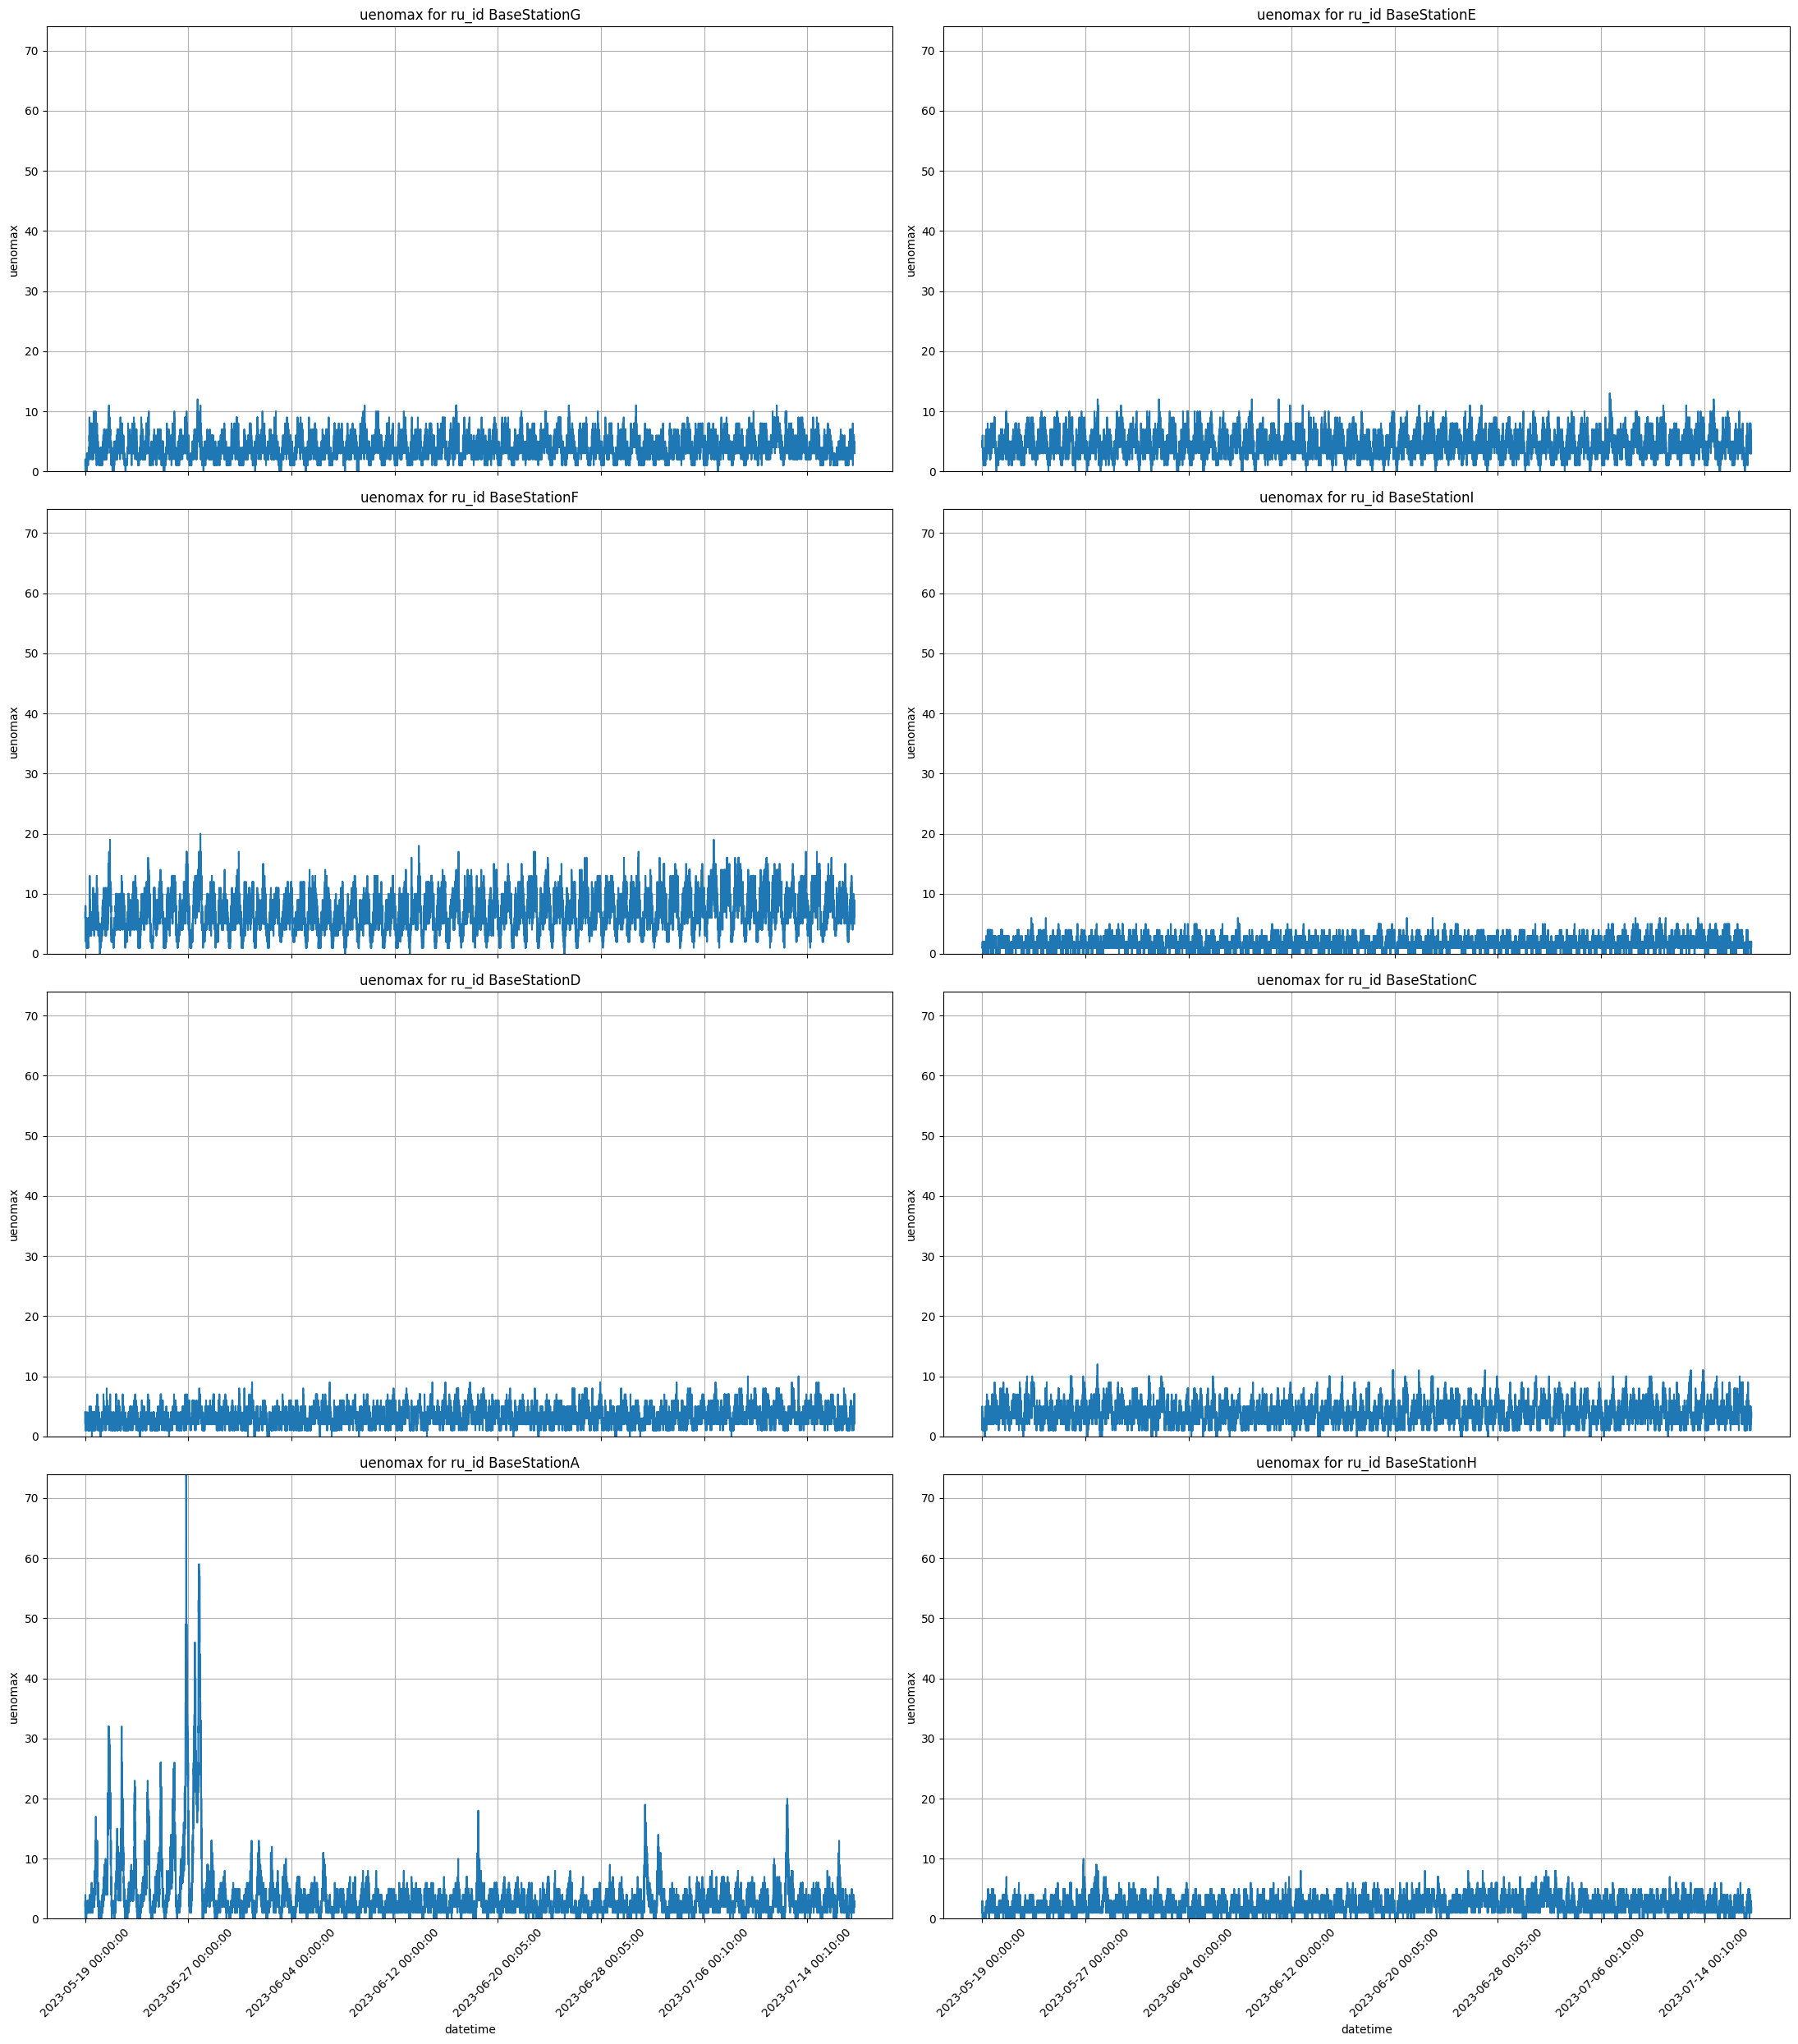

In [87]:
ru_ids = Q1_train['ru_id'].unique()
num_plots = len(ru_ids)
fig, axes = plt.subplots(4, 2, figsize=(22, 25), sharex=True)

for i, ru_id in enumerate(ru_ids):
    row = i // 2
    col = i % 2
    
    subset_data = Q1_train[Q1_train['ru_id'] == ru_id]
    sns.lineplot(data=subset_data, x='datetime', y='uenomax', ax=axes[row, col])
    axes[row, col].set_title(f'uenomax for ru_id {ru_id}')
    axes[row, col].set_ylabel('uenomax')
    axes[row, col].grid(True)
    xtick_locations = subset_data.iloc[::2304, 0].values
    axes[row, col].set_xticks(xtick_locations)
    axes[row, col].set_xticklabels(xtick_locations, rotation=45)
    axes[row, col].set_ylim(Q1_train['uenomax'].min(), Q1_train['uenomax'].max())

plt.tight_layout()
plt.show()

In [88]:
time_df = Q1_train.copy()

time_df['time'] = pd.to_datetime(time_df['datetime']).dt.time
time_df['week'] = pd.to_datetime(time_df['datetime']).dt.weekday
time_df['hour_of_day'] = pd.to_datetime(time_df['datetime']).dt.hour

# 새벽, 주간, 저녁으로 시간대 분리
def time_category(hour):
    if 0 <= hour < 7:
        return 'bedtime'
    elif 7 <= hour < 17:
        return 'day'
    else:
        return 'evening'

time_df['time_category'] = time_df['hour_of_day'].apply(time_category)

In [89]:
time_df.head(2)

,datetime,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,endcmodbysgnbatt,endcmodbysgnbsucc,connestabatt,connestabsucc,redirectiontolte_coverageout,redirectiontolte_epsfallback,redirectiontolte_emergencyfallback,handoveratt,handoversucc,reestabatt,reestabsucc,rlculbyte,rlcdlbyte,totprbulavg,totprbdlavg,dlreceivedriavg,dltransmittedmcsavg,airmaculbyte,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb,uenomax,time,week,hour_of_day,time_category
0,2023-05-19 00:00:00,BaseStationG,0,0.0,12,12,10,10,0,0,0,0,4,4,0,0,0,0,0,0,0,0.0,0.0,0.0,0.8,2.4,0.8,36.0,34.0,10.5,22.4,47.0,47.0,17.0,2243.0,-93.3,11.1,0,1,00:00:00,4,0,bedtime
1,2023-05-19 00:00:00,BaseStationE,0,0.0,28,28,27,27,11,11,34,33,1,1,0,0,0,0,0,0,0,1242.0,57165.0,0.2,1.3,2.1,8.2,1915.0,73315.0,19.4,8.8,174.0,174.0,39.0,2240.0,-93.5,10.2,4,5,00:00:00,4,0,bedtime


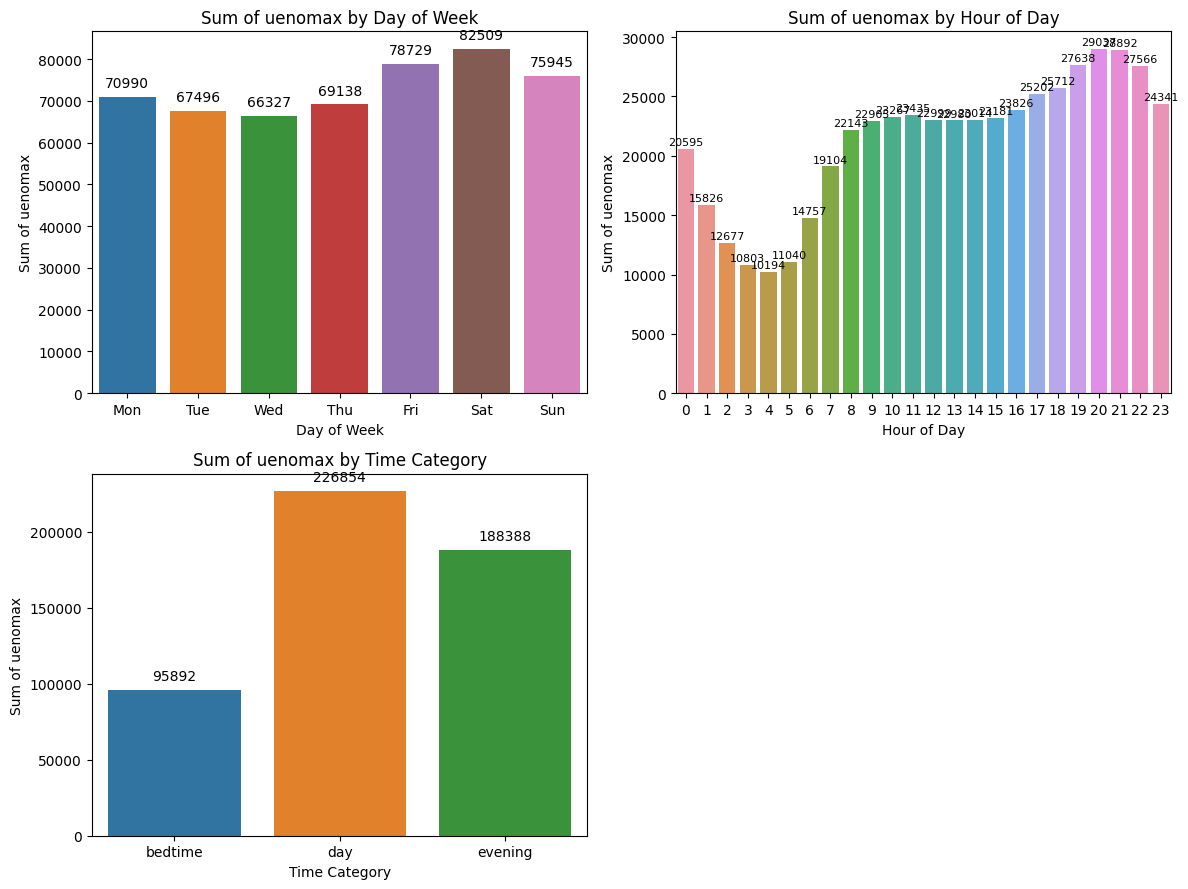

In [90]:
plt.figure(figsize=(12,9))

# 요일별 uenomax의 합
plt.subplot(2, 2, 1)
ax_week = sns.barplot(x='week', y='uenomax', data=time_df.groupby('week')['uenomax'].sum().reset_index())
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week')
plt.ylabel('Sum of uenomax')
plt.title('Sum of uenomax by Day of Week')

for p in ax_week.patches:
    ax_week.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# 시간별 uenomax의 합
plt.subplot(2, 2, 2)
ax_hour = sns.barplot(x='hour_of_day', y='uenomax', data=time_df.groupby('hour_of_day')['uenomax'].sum().reset_index())
plt.xlabel('Hour of Day')
plt.ylabel('Sum of uenomax')
plt.title('Sum of uenomax by Hour of Day')

for p in ax_hour.patches:
    ax_hour.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

# 시간 범주별 uenomax의 합
plt.subplot(2, 2, 3)
ax_time_category = sns.barplot(x='time_category', y='uenomax', data=time_df.groupby('time_category')['uenomax'].sum().reset_index())
plt.xlabel('Time Category')
plt.ylabel('Sum of uenomax')
plt.title('Sum of uenomax by Time Category')

for p in ax_time_category.patches:
    ax_time_category.annotate(format(p.get_height(), '.0f'), 
                              (p.get_x() + p.get_width() / 2., p.get_height()), 
                              ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


### Autocorrelation

In [91]:
train_stations = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
basestations = {}  # 기지국 데이터프레임을 저장하기 위한 딕셔너리 생성
autocorrelations = {}  # 각 기지국의 자기상관관계를 저장하기 위한 딕셔너리 생성

for station in train_stations:
    basestations[f'BaseStation_{station}'] = Q1_train[Q1_train['ru_id'] == f'BaseStation{station}']
    autocorrelation = {}  # 현재 기지국의 자기상관관계를 저장하기 위한 딕셔너리 생성
    
    for col in basestations[f'BaseStation_{station}'].columns[2:]:
        autocorr = basestations[f'BaseStation_{station}'][col].autocorr()
        autocorrelation[col] = autocorr
    autocorrelations[f'BaseStation_{station}'] = autocorrelation

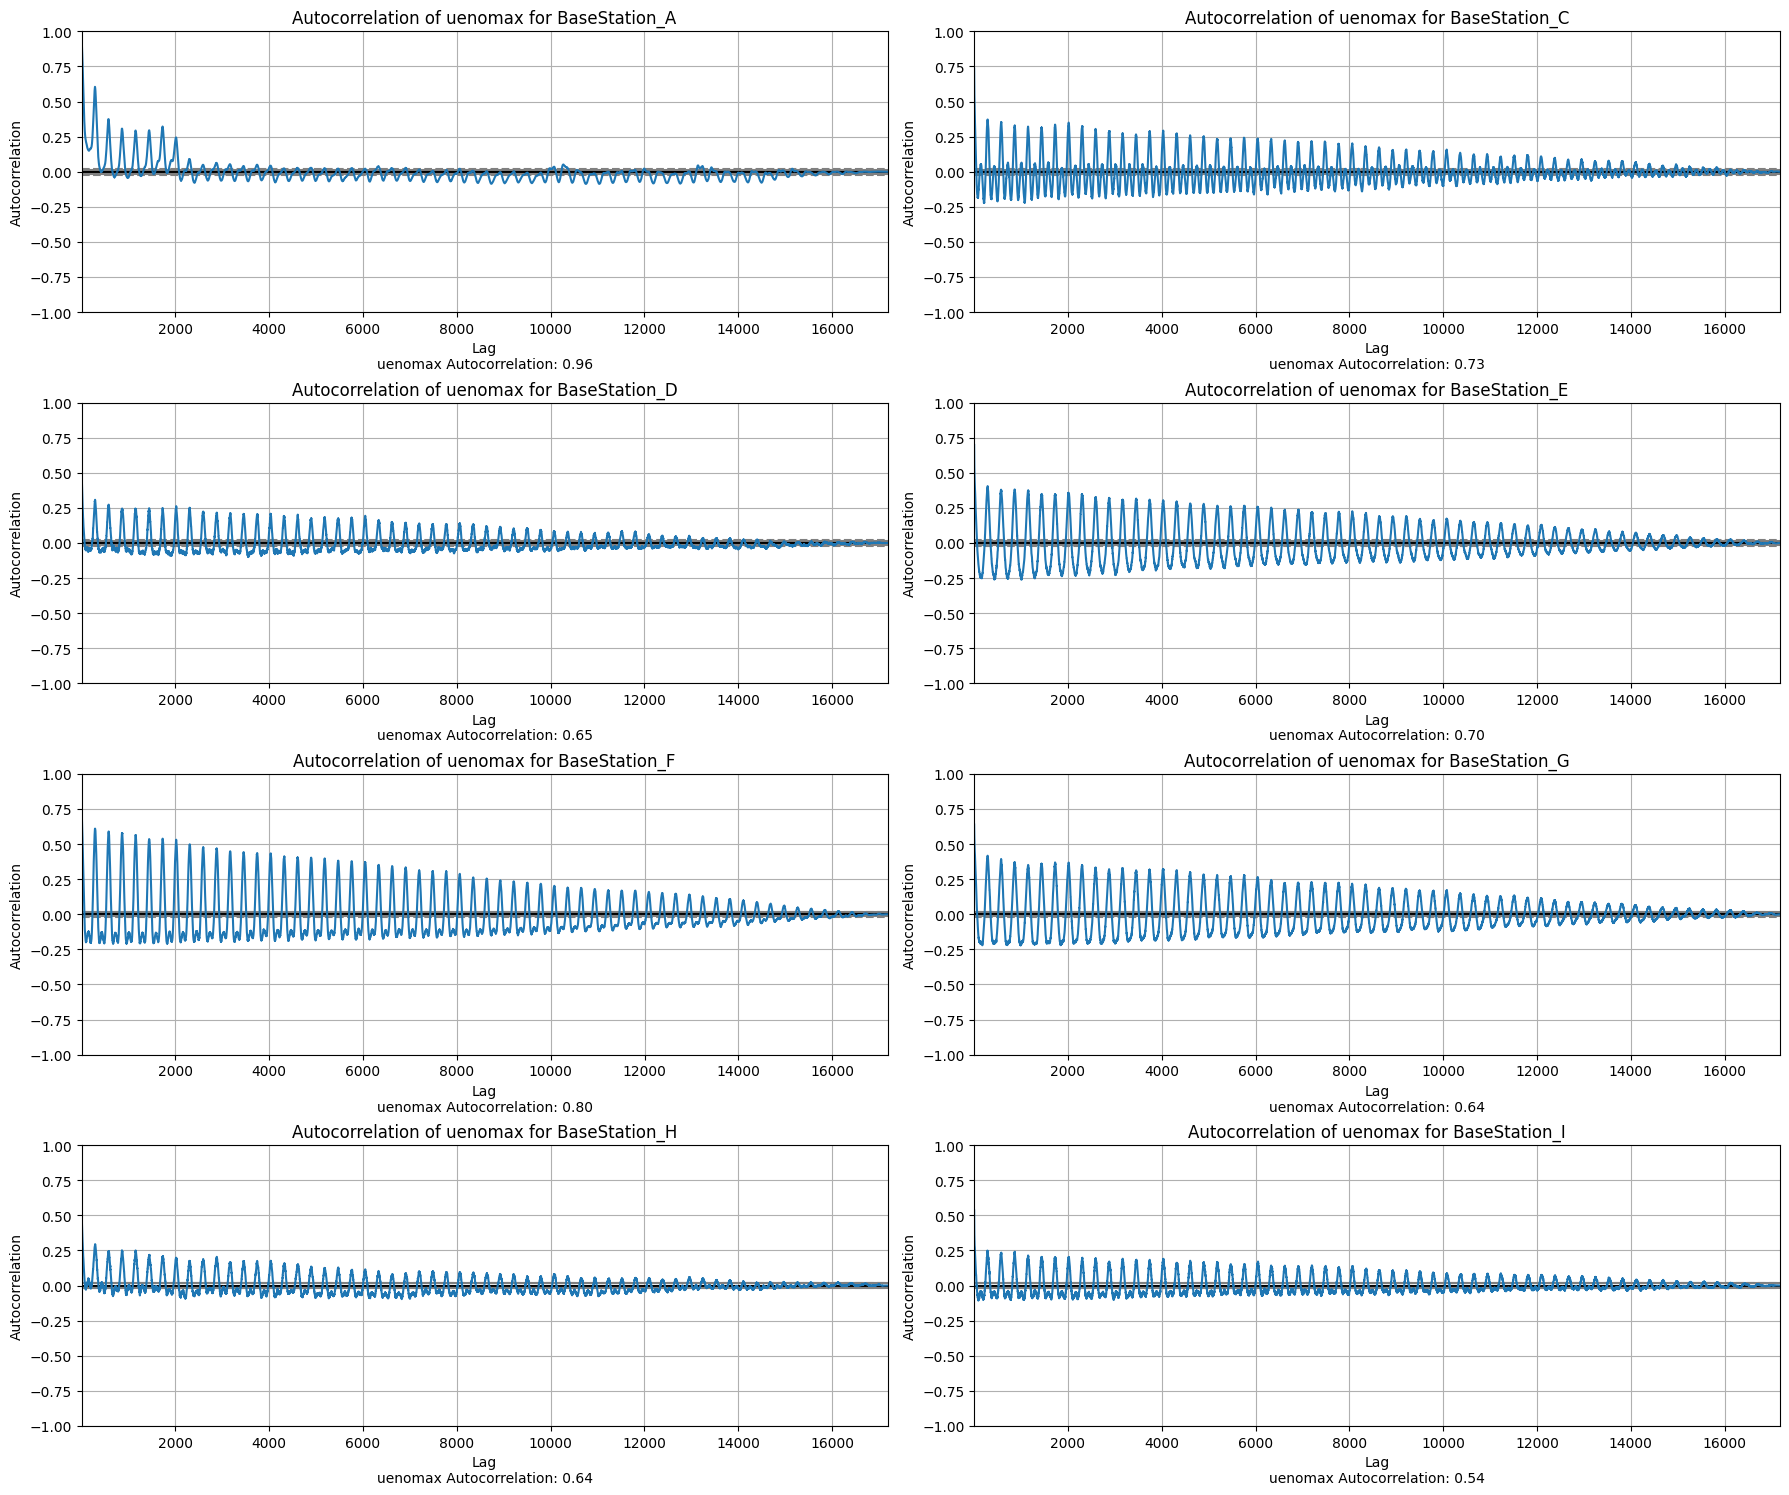

In [92]:
plt.figure(figsize=(18, 15))
for i, station in enumerate(train_stations):
    selected_column = 'uenomax'
    selected_autocorrelation = autocorrelations[f'BaseStation_{station}'][selected_column]

    plt.subplot(4, 2, i + 1) 
    pd.plotting.autocorrelation_plot(basestations[f'BaseStation_{station}'][selected_column])
    plt.title(f'Autocorrelation of {selected_column} for BaseStation_{station}')
    
    plt.text(0.5, -0.2, f'{selected_column} Autocorrelation: {selected_autocorrelation:.2f}', ha='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

### Numerical Features

In [93]:
int_cols = ['scgfail', 'erabaddatt', 'erabaddsucc', 'endcaddatt', 'endcaddsucc', 'endcmodbymenbatt', 'endcmodbymenbsucc', 'endcmodbysgnbatt', 'endcmodbysgnbsucc', 'connestabatt', 'connestabsucc', 'redirectiontolte_coverageout', 'redirectiontolte_epsfallback', 'redirectiontolte_emergencyfallback', 'handoveratt', 'handoversucc', 'reestabatt', 'reestabsucc', 'rlculbyte', 'airmaculbyte', 'rachpreamblea', 'numrar', 'nummsg3', 'attpaging', 'endcrelbymenb']
float_cols = ['scgfailratio', 'rlcdlbyte', 'totprbulavg', 'totprbdlavg', 'dlreceivedriavg', 'dltransmittedmcsavg', 'airmacdlbyte', 'bler_ul', 'bler_dl', 'rssipathavg', 'dlreceivedcqiavg']

numerical_cols = Q1_train.columns[2:-1]

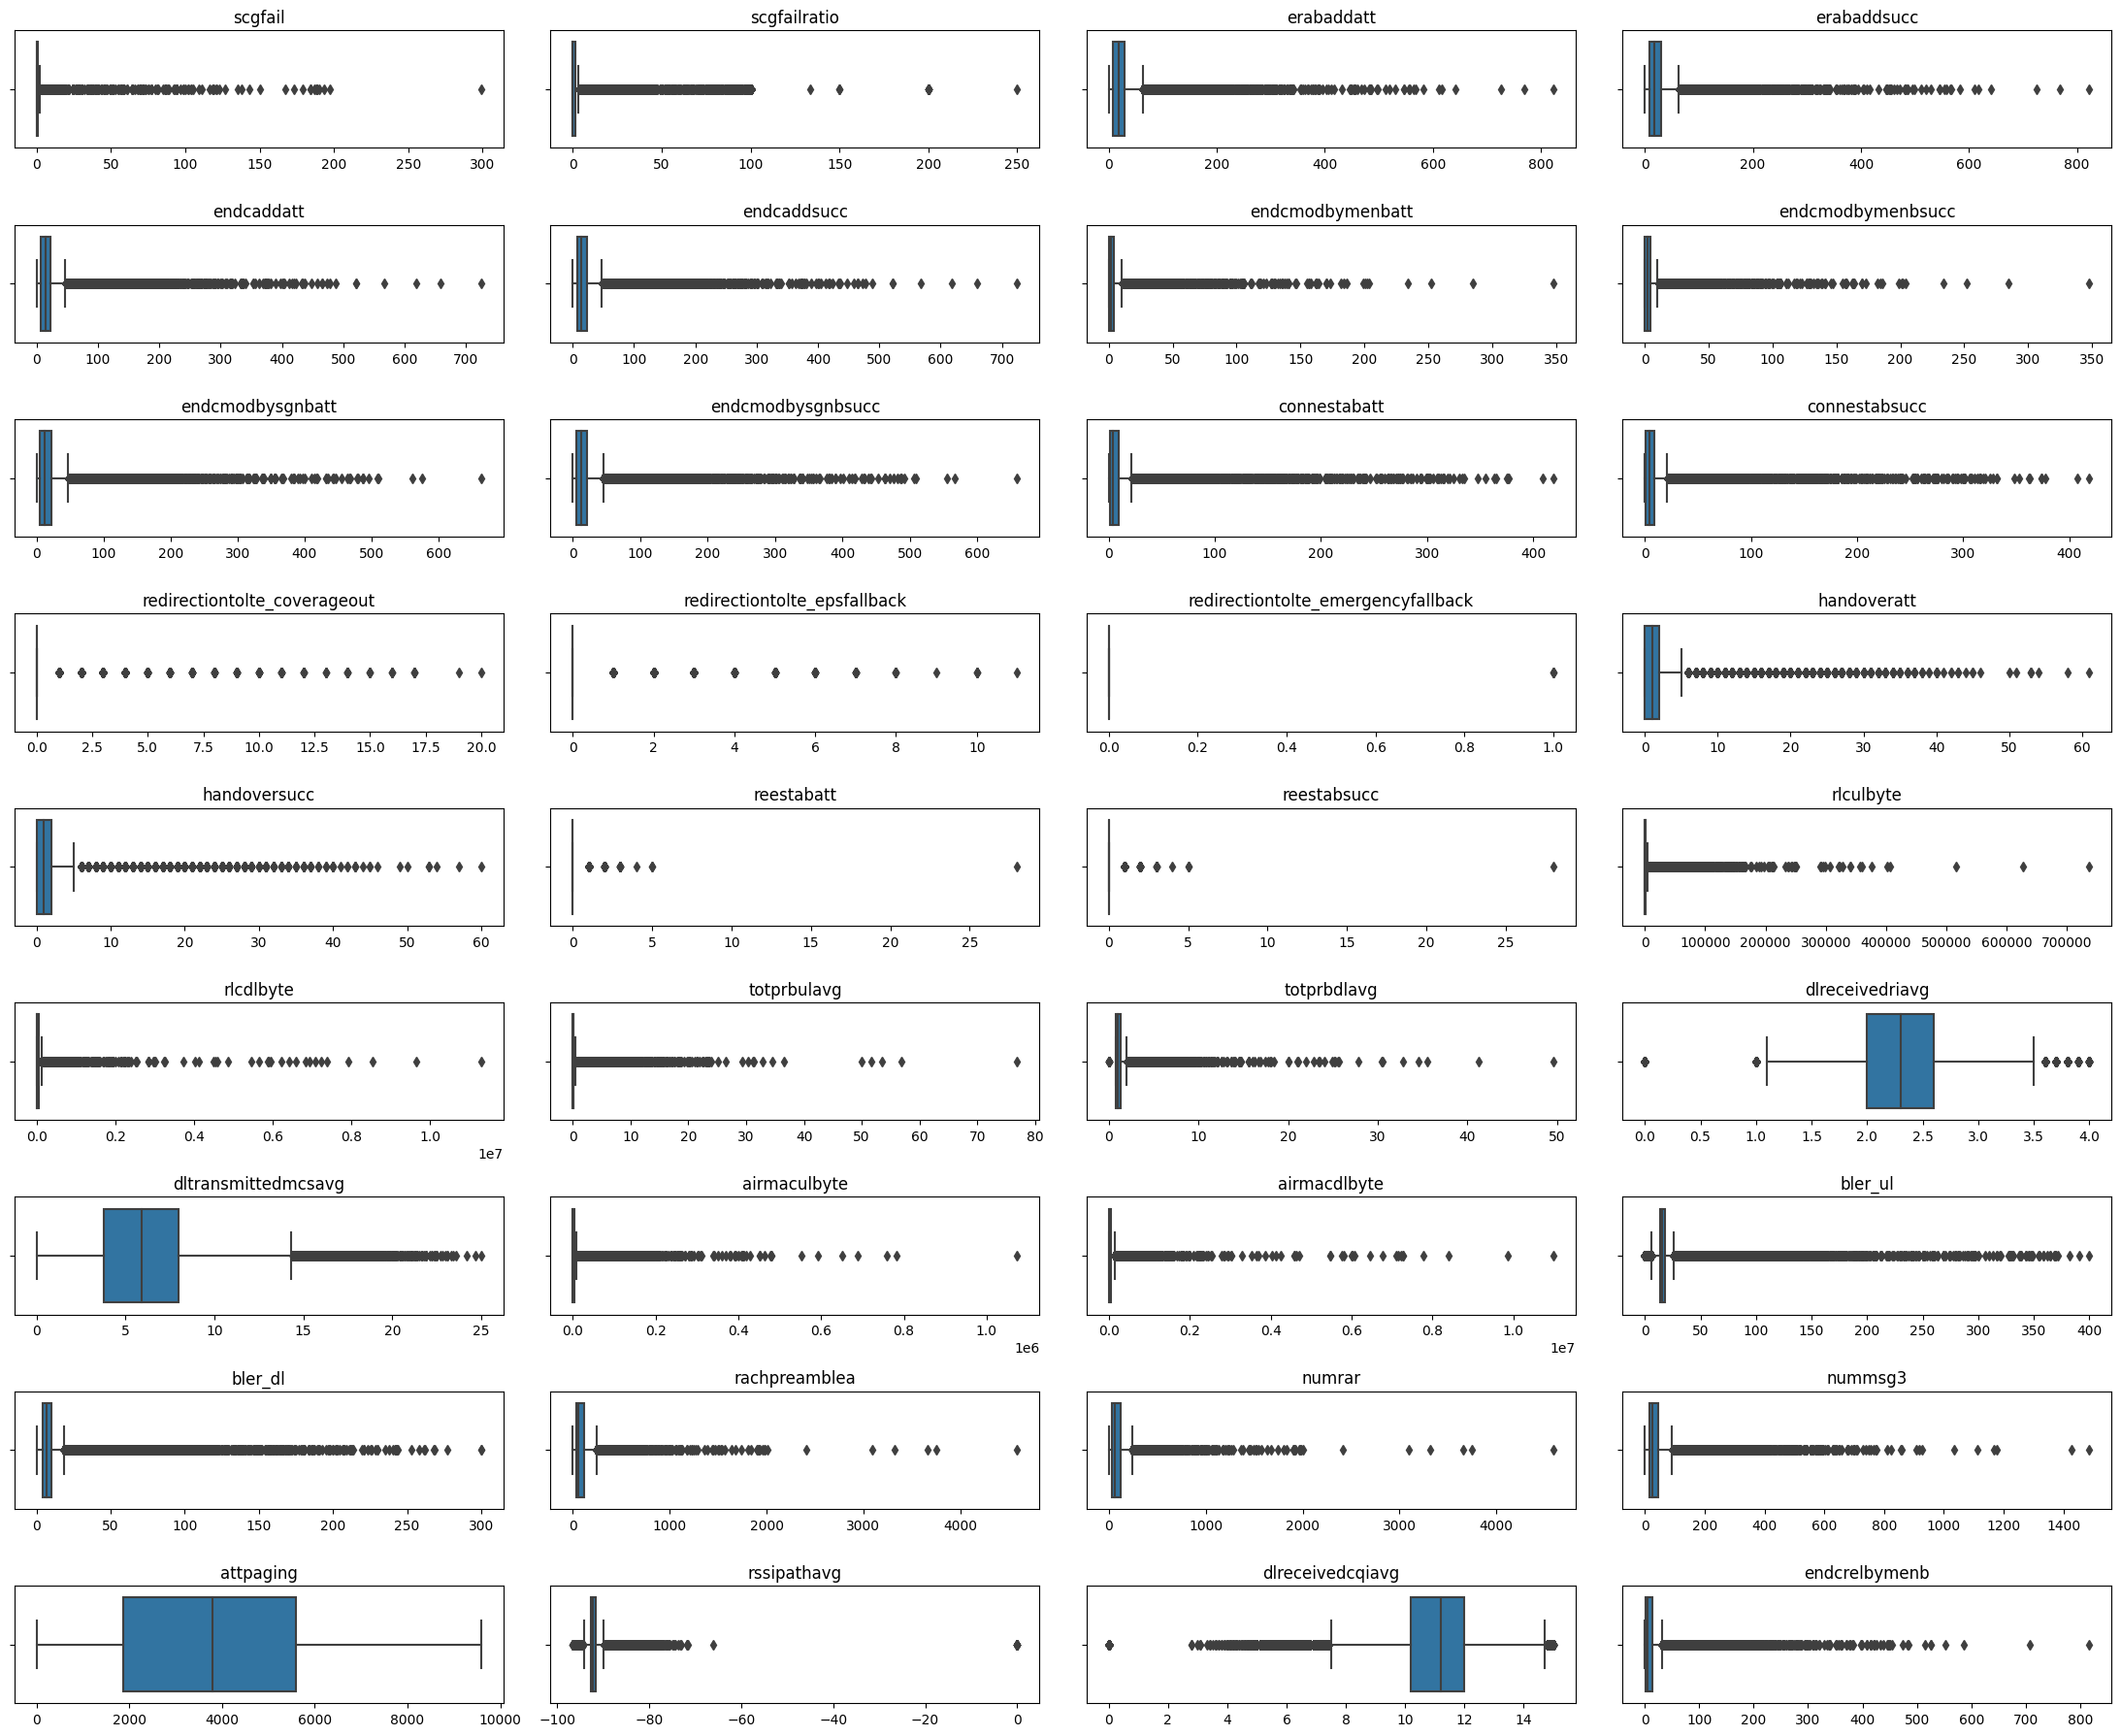

In [94]:
plt.figure(figsize=(22, 18))
num_rows = 9
num_cols = 4

for i, col in enumerate(numerical_cols):
    ax = plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=Q1_train[col])
    ax.set_xlabel('')
    plt.title(col)

plt.tight_layout()
plt.show()

In [95]:
# num_rows = 9
# num_cols = 4
# total_plots = num_rows * num_cols

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(22, 18))
# axes = axes.flatten()

# for i, col in enumerate(numerical_cols):
#     if i < total_plots:
#         ax = axes[i]
#         sns.regplot(x=col, y='uenomax', data=Q1_train, ax=ax, line_kws={'color': 'red'})
#         ax.set_title(f'{col}')

# # Hide any remaining empty subplots
# for j in range(i+1, total_plots):
#     axes[j].axis('off')

# plt.tight_layout()
# plt.show()


In [96]:
time_train = Q1_train.copy()
time_train['date'] = pd.to_datetime(time_train['datetime']).dt.date

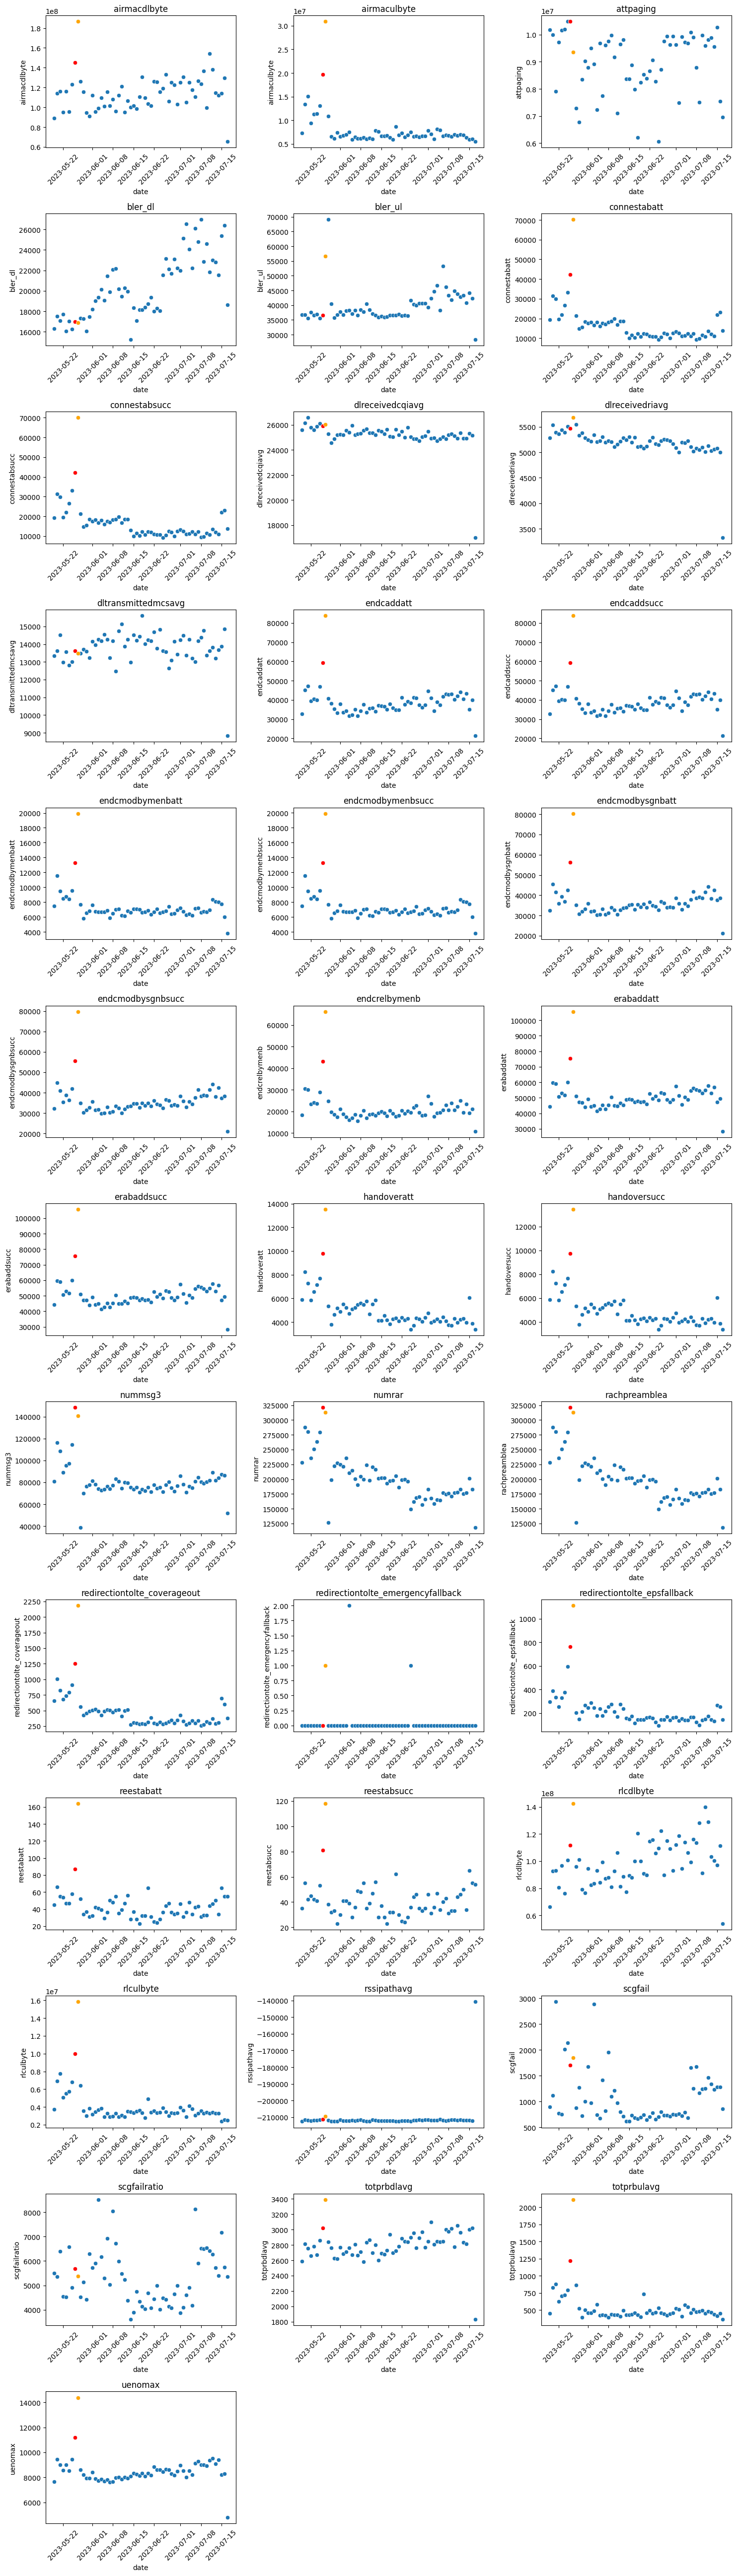

In [97]:
p1 = pd.pivot_table(data=time_train, index='date', values=[ 'scgfail', 'scgfailratio', 'erabaddatt',
       'erabaddsucc', 'endcaddatt', 'endcaddsucc', 'endcmodbymenbatt',
       'endcmodbymenbsucc', 'endcmodbysgnbatt', 'endcmodbysgnbsucc',
       'connestabatt', 'connestabsucc', 'redirectiontolte_coverageout',
       'redirectiontolte_epsfallback', 'redirectiontolte_emergencyfallback',
       'handoveratt', 'handoversucc', 'reestabatt', 'reestabsucc', 'rlculbyte',
       'rlcdlbyte', 'totprbulavg', 'totprbdlavg', 'dlreceivedriavg',
       'dltransmittedmcsavg', 'airmaculbyte', 'airmacdlbyte', 'bler_ul',
       'bler_dl', 'rachpreamblea', 'numrar', 'nummsg3', 'attpaging',
       'rssipathavg', 'dlreceivedcqiavg', 'endcrelbymenb', 'uenomax'],
                    aggfunc='sum').reset_index()

p1['date'] = pd.to_datetime(p1['date'])

columns_to_plot = p1.columns.drop('date')

num_cols = min(len(columns_to_plot), 3)
num_rows = (len(columns_to_plot) - 1) // num_cols + 1

if len(columns_to_plot) > num_rows * num_cols:
    num_cols = min(len(columns_to_plot), 2)
    num_rows = (len(columns_to_plot) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))  # Increase the second value

axes = axes.flatten()

highlight_date_1 = '2023-05-26'
highlight_date_2 = '2023-05-27'

for i, column in enumerate(columns_to_plot):
    sns.scatterplot(x='date', y=column, data=p1, ax=axes[i])
    
    for date, color in [(highlight_date_1, 'red'), (highlight_date_2, 'orange')]:
        sns.scatterplot(x='date', y=column, data=p1[p1['date'] == date], color=color, ax=axes[i])

    axes[i].set_title(column)
    
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(columns_to_plot), num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Correlation

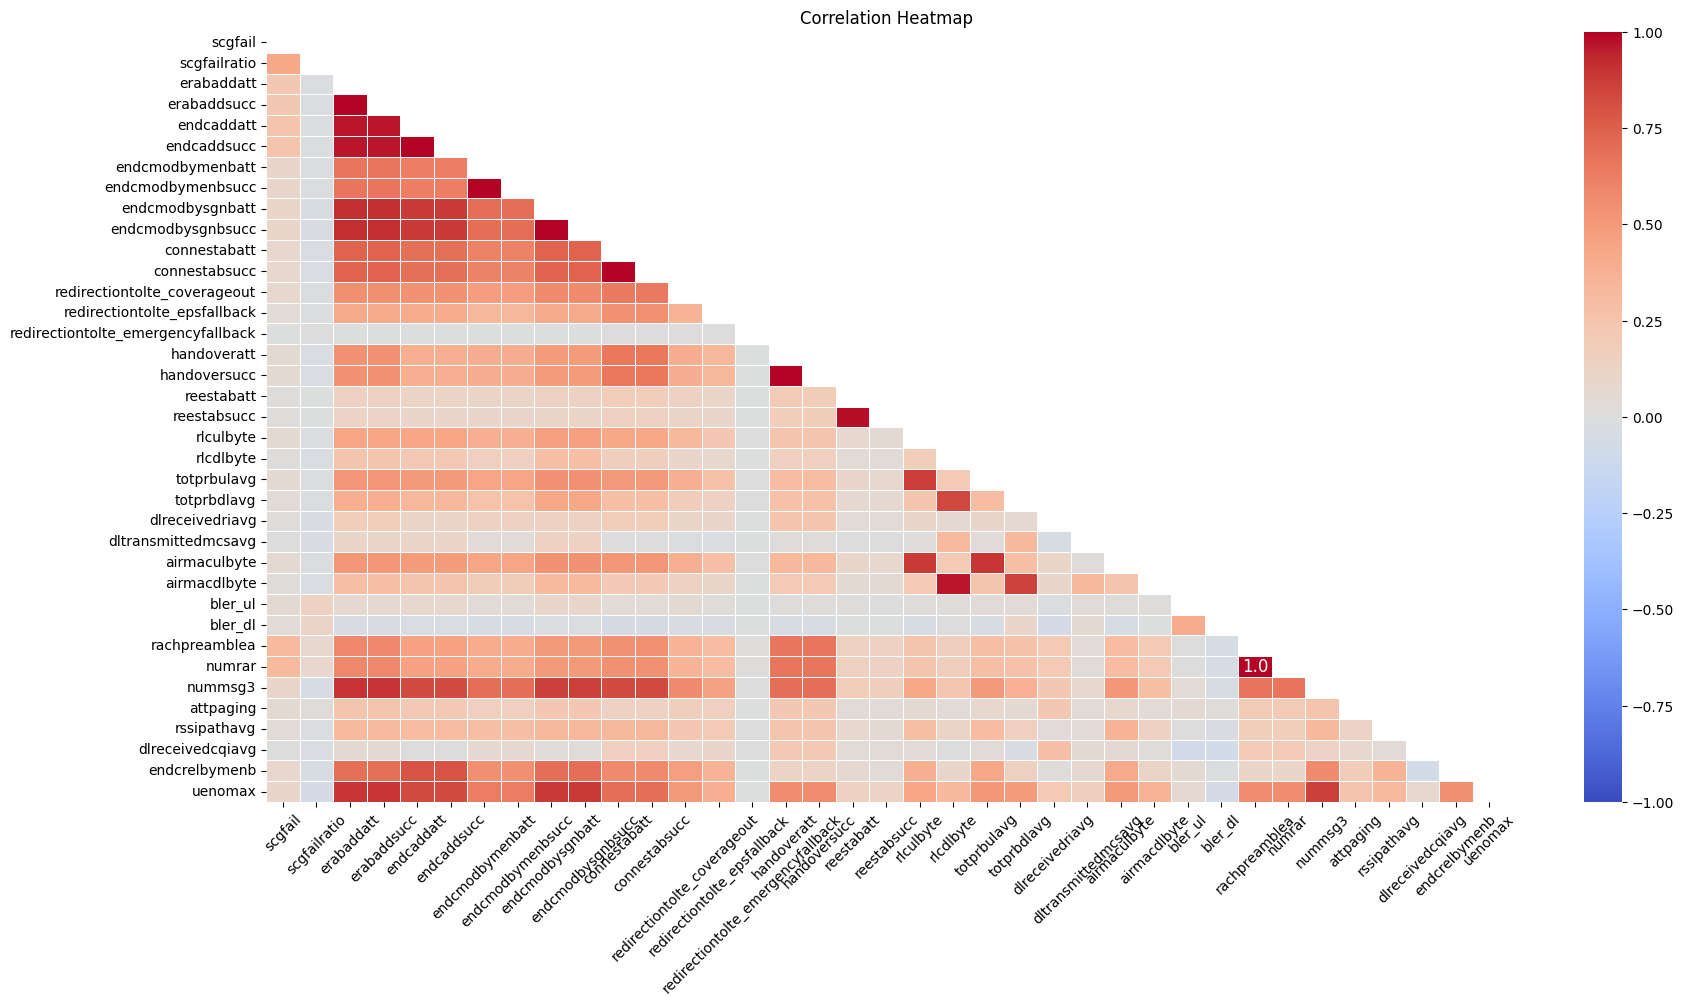

In [98]:
# Correlation
corr_df = Q1_train.iloc[:, 2:].corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool)) 
plt.figure(figsize=(20, 10))
sns.heatmap(corr_df, cmap='coolwarm', vmin=-1, center=0, annot=False, fmt=".1g", linewidths=0.5, mask=mask)

# 상관계수가 1인 셀 강조
for i in range(corr_df.shape[0]):
    for j in range(corr_df.shape[1]):
        if i != j and corr_df.iloc[i, j] == 1:
            plt.text(j + 0.5, i + 0.5, '1.0', ha='center', va='center', color='w', fontsize=12)

plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [99]:
threshold = 0.8

filtered_corr_df = corr_df[(corr_df['uenomax'] > threshold) | (corr_df['uenomax'] < -threshold)]
filtered_corr_df[['uenomax']]

,uenomax
erabaddatt,0.896146
erabaddsucc,0.896125
endcaddatt,0.830944
endcaddsucc,0.830942
endcmodbysgnbatt,0.875879
endcmodbysgnbsucc,0.875179
nummsg3,0.861977
uenomax,1.000000


In [100]:
# Correlation
corr_df = Q1_train.iloc[:, 2:].corr()
corr_df['uenomax'].sort_values(ascending=True).nsmallest(10)

bler_dl                              -0.063201
scgfailratio                         -0.062925
redirectiontolte_emergencyfallback   -0.000909
bler_ul                               0.065954
dlreceivedcqiavg                      0.071826
scgfail                               0.089946
reestabsucc                           0.128647
reestabatt                            0.146229
dltransmittedmcsavg                   0.168051
dlreceivedriavg                       0.206080
Name: uenomax, dtype: float64

### VIF

In [101]:
# 각 'ru_id'에 대한 데이터프레임 저장
train_stations = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
basestations = {}  # BaseStation 데이터프레임을 저장할 딕셔너리 생성
for station in train_stations:
    basestations[f'ru_id_{station}'] = Q1_train[Q1_train['ru_id'] == f'BaseStation{station}']

basestations['ru_id_C'].head(3)

,datetime,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,endcmodbysgnbatt,endcmodbysgnbsucc,connestabatt,connestabsucc,redirectiontolte_coverageout,redirectiontolte_epsfallback,redirectiontolte_emergencyfallback,handoveratt,handoversucc,reestabatt,reestabsucc,rlculbyte,rlcdlbyte,totprbulavg,totprbdlavg,dlreceivedriavg,dltransmittedmcsavg,airmaculbyte,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb,uenomax
5,2023-05-19 00:00:00,BaseStationC,0,0.0,13,13,9,9,7,7,18,18,10,10,0,0,0,0,0,0,0,959.0,53771.0,0.2,1.4,2.0,6.5,2006.0,55524.0,15.7,16.6,47.0,47.0,25.0,2083.0,-91.7,9.4,9,4
13,2023-05-19 00:05:00,BaseStationC,1,7.7,13,13,12,12,3,3,11,11,5,5,0,0,0,0,0,0,0,271.0,38283.0,0.1,1.2,2.0,8.5,845.0,40370.0,16.3,10.8,37.0,37.0,18.0,1936.0,-91.7,9.1,7,3
21,2023-05-19 00:10:00,BaseStationC,0,0.0,20,20,17,17,0,0,21,21,5,5,0,0,0,0,0,0,0,240.0,64443.0,0.1,1.4,2.0,10.2,588.0,70084.0,15.7,12.5,48.0,48.0,27.0,1874.0,-91.7,9.1,20,5


In [102]:
# 기지국마다 vif 확인하는 함수
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# 각 데이터 프레임을 반복하여 VIF를 계산하고 상위 10개의 VIF 값 출력
for station in train_stations:
    selected_df = basestations[f'ru_id_{station}']
    columns_to_keep = [col for col in selected_df.columns if col not in ['datetime', 'ru_id']]
    cleaned_df = selected_df[columns_to_keep].dropna()
    
    vif_result = calculate_vif(cleaned_df)
    vif_result_sorted = vif_result.sort_values(by='VIF', ascending=False)
    
    print(f"Top 10 VIF values for ru_id_{station}:")
    print(vif_result_sorted.head(10))
    print("\n")

c:\Users\medici\miniconda3\envs\test\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\medici\miniconda3\envs\test\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Top 10 VIF values for ru_id_A:
             Variable           VIF
29      rachpreamblea           inf
30             numrar           inf
4          endcaddatt  4.715836e+06
5         endcaddsucc  4.714708e+06
3         erabaddsucc  3.319685e+06
2          erabaddatt  3.319500e+06
6    endcmodbymenbatt  1.145520e+05
7   endcmodbymenbsucc  1.145396e+05
10       connestabatt  5.016575e+04
11      connestabsucc  5.012498e+04




c:\Users\medici\miniconda3\envs\test\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\medici\miniconda3\envs\test\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Top 10 VIF values for ru_id_C:
             Variable           VIF
30             numrar           inf
29      rachpreamblea           inf
5         endcaddsucc  2.467148e+05
4          endcaddatt  2.466394e+05
2          erabaddatt  1.645346e+05
3         erabaddsucc  1.644942e+05
6    endcmodbymenbatt  5.237738e+03
7   endcmodbymenbsucc  5.231259e+03
10       connestabatt  4.029767e+03
11      connestabsucc  4.022095e+03




c:\Users\medici\miniconda3\envs\test\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\medici\miniconda3\envs\test\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Top 10 VIF values for ru_id_D:
             Variable           VIF
30             numrar           inf
29      rachpreamblea           inf
4          endcaddatt  7.392507e+05
5         endcaddsucc  7.390734e+05
2          erabaddatt  6.681321e+05
3         erabaddsucc  6.678503e+05
10       connestabatt  2.657767e+03
11      connestabsucc  2.652593e+03
6    endcmodbymenbatt  2.230459e+03
7   endcmodbymenbsucc  2.229438e+03




c:\Users\medici\miniconda3\envs\test\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\medici\miniconda3\envs\test\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Top 10 VIF values for ru_id_E:
             Variable           VIF
30             numrar           inf
29      rachpreamblea           inf
4          endcaddatt  3.270065e+05
5         endcaddsucc  3.269266e+05
2          erabaddatt  2.231515e+05
3         erabaddsucc  2.231168e+05
6    endcmodbymenbatt  2.643732e+04
7   endcmodbymenbsucc  2.643553e+04
10       connestabatt  3.942043e+03
11      connestabsucc  3.921299e+03




c:\Users\medici\miniconda3\envs\test\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\medici\miniconda3\envs\test\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Top 10 VIF values for ru_id_F:
             Variable           VIF
30             numrar           inf
29      rachpreamblea           inf
5         endcaddsucc  9.037426e+05
4          endcaddatt  9.036033e+05
2          erabaddatt  2.744288e+05
3         erabaddsucc  2.744122e+05
6    endcmodbymenbatt  4.629501e+04
7   endcmodbymenbsucc  4.629295e+04
10       connestabatt  1.146472e+04
11      connestabsucc  1.138752e+04




c:\Users\medici\miniconda3\envs\test\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Top 10 VIF values for ru_id_G:
             Variable           VIF
30             numrar           inf
29      rachpreamblea           inf
5         endcaddsucc  2.411625e+05
4          endcaddatt  2.411346e+05
3         erabaddsucc  1.483660e+05
2          erabaddatt  1.483565e+05
6    endcmodbymenbatt  3.069915e+04
7   endcmodbymenbsucc  3.069288e+04
10       connestabatt  3.111285e+03
11      connestabsucc  3.088450e+03




c:\Users\medici\miniconda3\envs\test\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\medici\miniconda3\envs\test\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Top 10 VIF values for ru_id_H:
             Variable           VIF
30             numrar           inf
29      rachpreamblea           inf
5         endcaddsucc  3.636383e+05
4          endcaddatt  3.635705e+05
2          erabaddatt  1.794278e+05
3         erabaddsucc  1.794143e+05
7   endcmodbymenbsucc  2.051602e+04
6    endcmodbymenbatt  2.051382e+04
10       connestabatt  7.987444e+03
11      connestabsucc  7.962795e+03




c:\Users\medici\miniconda3\envs\test\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Top 10 VIF values for ru_id_I:
             Variable           VIF
30             numrar           inf
29      rachpreamblea           inf
5         endcaddsucc  1.354127e+05
4          endcaddatt  1.353838e+05
3         erabaddsucc  5.451709e+04
2          erabaddatt  5.451148e+04
6    endcmodbymenbatt  3.008496e+03
7   endcmodbymenbsucc  3.007452e+03
10       connestabatt  1.793585e+03
11      connestabsucc  1.791630e+03




### Feature

In [103]:
Q1_train = Q1_train.dropna()

In [104]:
print('Are these two columns(rachpreamblea, numrar) identical?',(Q1_train['rachpreamblea'] == Q1_train['numrar']).all())

print('Display any rows that are not identical between the two cols:')
display((Q1_train[Q1_train['rachpreamblea'] != Q1_train['numrar']]).head(2))
print("Yes, 'rachpreamblea' and 'numrar' are identical. If the result shows otherwise, it's because of the NaNs.")

Are these two columns(rachpreamblea, numrar) identical? True
Display any rows that are not identical between the two cols:


,datetime,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,endcmodbysgnbatt,endcmodbysgnbsucc,connestabatt,connestabsucc,redirectiontolte_coverageout,redirectiontolte_epsfallback,redirectiontolte_emergencyfallback,handoveratt,handoversucc,reestabatt,reestabsucc,rlculbyte,rlcdlbyte,totprbulavg,totprbdlavg,dlreceivedriavg,dltransmittedmcsavg,airmaculbyte,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb,uenomax


Yes, 'rachpreamblea' and 'numrar' are identical. If the result shows otherwise, it's because of the NaNs.


### Why we dropped BaseStations (A, E, F, G)

In [105]:
def compare_feature_statistics(feature_name): 
    group_train = Q1_train.groupby('ru_id').describe()
    group_train = group_train[feature_name] 
    group_train_transposed = group_train.transpose()

    group_test = Q1_test.groupby('ru_id').describe()
    group_test = group_test[feature_name] 
    group_test_transposed = group_test.transpose()

    group_concat = pd.concat([group_train_transposed, group_test_transposed], axis=1)
    return group_concat

compare_feature_statistics('rlculbyte')

ru_id,BaseStationA,BaseStationC,BaseStationD,BaseStationE,BaseStationF,BaseStationG,BaseStationH,BaseStationI,BaseStationB,BaseStationJ
count,17181.000000,17181.000000,17181.000000,17177.000000,17177.000000,17177.000000,17181.000000,17181.000000,17181.000000,17181.000000
mean,2818.198126,1545.847739,929.370526,1821.169937,4296.127671,1368.364674,892.958442,331.495373,499.454339,500.333333
std,16701.786434,5712.166072,2246.109068,4430.318556,10402.011630,3653.785054,3950.904017,2138.928157,2075.256505,8828.728176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,209.000000,92.000000,472.000000,1179.000000,253.000000,39.000000,2.000000,4.000000,5.000000
50%,178.000000,752.000000,443.000000,1191.000000,2466.000000,716.000000,261.000000,55.000000,92.000000,78.000000
75%,814.000000,1733.000000,1171.000000,2278.000000,4420.000000,1522.000000,899.000000,297.000000,496.000000,353.000000
max,737286.000000,407110.000000,105883.000000,323542.000000,376231.000000,143341.000000,292422.000000,184022.000000,182096.000000,917781.000000
